In [ ]:
def update_progress(n,max_value):
    ''' Create a progress bar
    
    Args:
        n (int): current count
        max_value (int): ultimate values
    
    '''
    import sys
    barLength = 20 # Modify this to change the length of the progress bar
    status = ""
    progress = np.round(float(n/max_value),decimals=2)
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    #if progress >= 1.:
    #    progress = 1
    #    status = "Done...\r\n"
    if n == max_value:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\r{0}% ({1} of {2}): |{3}|  {4}".format(np.round(progress*100,decimals=1), 
                                                  n, 
                                                  max_value, 
                                                  "#"*block + "-"*(barLength-block), 
                                                  status)
    sys.stdout.write(text)
    sys.stdout.flush()

def MonteCarloIt(thing, N = 10000):
    ''' 
    Generate a random sample of size = N from a 
    Gaussian centered at thing[0] with std thing[1]
    
    Args:
        thing (tuple, flt): tuple of (value,uncertainty).  Can be either astropy units object \
            or float
        N (int): number of samples
    Returns:
        array: N random samples from a Gaussian.

    Written by Logan Pearce, 2020
    '''
    try:
        out = np.random.normal(thing[0].value,thing[1].value,N)
    except:
        out = np.random.normal(thing[0],thing[1],N)

    return out

In [171]:
import pickle
Amag_SDSS,e_Amag_SDSS,Cmag_SDSS,e_Cmag_SDSS = pickle.load(open('SDSS-magnitudes-noatm.pkl','rb'))

Cmag_SDSS_dict = {'z':Cmag_SDSS[0],'i':Cmag_SDSS[1],'r':Cmag_SDSS[2],'g':Cmag_SDSS[3]}
e_Cmag_SDSS_dict = {'z':e_Cmag_SDSS[0],'i':e_Cmag_SDSS[1],'r':e_Cmag_SDSS[2],'g':e_Cmag_SDSS[3]}

Amag_SDSS_dict = {'z':Amag_SDSS[0],'i':Amag_SDSS[1],'r':Amag_SDSS[2],'g':Amag_SDSS[3]}
e_Amag_SDSS_dict = {'z':e_Amag_SDSS[0],'i':e_Amag_SDSS[1],'r':e_Amag_SDSS[2],'g':e_Amag_SDSS[3]}

CRminusI = MonteCarloIt([Cmag_SDSS_dict['r'],e_Cmag_SDSS_dict['r']]) - \
            MonteCarloIt([Cmag_SDSS_dict['i'],e_Cmag_SDSS_dict['i']])
CGminusR = MonteCarloIt([Cmag_SDSS_dict['g'],e_Cmag_SDSS_dict['g']]) - \
            MonteCarloIt([Cmag_SDSS_dict['r'],e_Cmag_SDSS_dict['r']])

ARminusI = MonteCarloIt([Amag_SDSS_dict['r'],e_Amag_SDSS_dict['r']]) - \
            MonteCarloIt([Amag_SDSS_dict['i'],e_Amag_SDSS_dict['i']])
AGminusR = MonteCarloIt([Amag_SDSS_dict['g'],e_Amag_SDSS_dict['g']]) - \
            MonteCarloIt([Amag_SDSS_dict['r'],e_Amag_SDSS_dict['r']])

Adistance = [220,2]

C_Mr = MonteCarloIt([Cmag_SDSS_dict['r'],e_Cmag_SDSS_dict['r']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mr = MonteCarloIt([Amag_SDSS_dict['r'],e_Amag_SDSS_dict['r']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
C_Mg = MonteCarloIt([Cmag_SDSS_dict['g'],e_Cmag_SDSS_dict['g']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mg = MonteCarloIt([Amag_SDSS_dict['g'],e_Amag_SDSS_dict['g']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
C_Mi = MonteCarloIt([Cmag_SDSS_dict['i'],e_Cmag_SDSS_dict['i']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mi = MonteCarloIt([Amag_SDSS_dict['i'],e_Amag_SDSS_dict['i']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
C_Mz = MonteCarloIt([Cmag_SDSS_dict['z'],e_Cmag_SDSS_dict['z']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5
A_Mz = MonteCarloIt([Amag_SDSS_dict['z'],e_Amag_SDSS_dict['z']]) - 5*np.log10(MonteCarloIt(Adistance)) + 5


CM = [np.mean(C_Mg),np.mean(C_Mr),np.mean(C_Mi),np.mean(C_Mz)]
eCM = [np.std(C_Mg),np.std(C_Mr),np.std(C_Mi),np.std(C_Mz)]

Ccolorlist = [np.mean(CGminusR),np.mean(CRminusI)]
eCcolorlist = [np.std(CGminusR),np.std(CRminusI)]

AM = [np.mean(A_Mg),np.mean(A_Mr),np.mean(A_Mi),np.mean(A_Mz)]
eAM = [np.std(A_Mg),np.std(A_Mr),np.std(A_Mi),np.std(A_Mz)]

Acolorlist = [np.mean(AGminusR),np.mean(ARminusI)]
eAcolorlist = [np.std(AGminusR),np.std(ARminusI)]

SDSS_filters_dict = {'z':0.8961,'i':0.7499,'r':0.6185,'g':.4719}
SDSS_filters = [SDSS_filters_dict['g'],SDSS_filters_dict['r'],SDSS_filters_dict['i'],SDSS_filters_dict['z']]
SDSS_filters

[0.4719, 0.6185, 0.7499, 0.8961]

In [3]:
import pandas as pd
parsec = pd.read_table('Parsec-synthphot-SDSS-YBCNewVega.dat', delim_whitespace = True, comment='#')
parsec

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Xn,Xo,Cexcess,Z,mbolmag,umag,gmag,rmag,imag,zmag
0,0.000155,-2.0,6.00000,0.093634,1.115611,0.094,-0.864,3.5727,3.516,0,...,0.000008,0.000072,-1.0,0.000237,6.930,11.176,8.761,7.423,6.866,6.526
1,0.000155,-2.0,6.00000,0.103569,1.200243,0.103,-0.787,3.5771,3.500,0,...,0.000008,0.000072,-1.0,0.000251,6.738,10.888,8.517,7.211,6.669,6.338
2,0.000155,-2.0,6.00000,0.124548,1.348571,0.124,-0.663,3.5851,3.488,0,...,0.000008,0.000072,-1.0,0.000188,6.427,10.406,8.113,6.864,6.347,6.032
3,0.000155,-2.0,6.00000,0.135026,1.410985,0.135,-0.622,3.5885,3.496,0,...,0.000008,0.000072,-1.0,0.000181,6.325,10.229,7.970,6.746,6.239,5.931
4,0.000155,-2.0,6.00000,0.145147,1.465567,0.145,-0.585,3.5916,3.503,0,...,0.000008,0.000072,-1.0,0.000186,6.234,10.069,7.841,6.639,6.143,5.841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85840,0.041619,0.5,10.10001,1.021150,2.477238,0.702,3.409,3.3920,-0.604,8,...,0.003282,0.018250,-1.0,0.041600,-3.752,10.446,7.520,4.313,0.969,-1.141
85841,0.041619,0.5,10.10001,1.021150,2.477238,0.674,3.449,3.3846,-0.692,8,...,0.003282,0.018250,-1.0,0.041600,-3.853,10.838,7.695,4.390,0.995,-1.148
85842,0.041619,0.5,10.10001,1.021150,2.477238,0.644,3.469,3.3827,-0.739,8,...,0.003282,0.018250,-1.0,0.041600,-3.902,11.021,7.777,4.426,1.006,-1.154
85843,0.041619,0.5,10.10001,1.021151,2.477238,0.612,3.481,3.3844,-0.766,8,...,0.003282,0.018250,-1.0,0.041600,-3.932,11.130,7.826,4.447,1.011,-1.158


In [4]:
parsec['r-i'] = parsec['rmag'] - parsec['imag']
parsec['g-r'] = parsec['gmag'] - parsec['rmag']
parsec['A chi2'] = np.nan
parsec['C chi2'] = np.nan

In [5]:
import warnings
warnings.filterwarnings('ignore')
filters = np.array(['gmag','rmag','imag','zmag'])
colors = np.array(['g-r','r-i'])

#m,t,r,absg,absr,absi,absz,gr,ri,chi2 = [],[],[],[],[]
for i in range(len(parsec)):
    Achisq = np.sum([( (AM[j]-parsec[filters[j]].loc[i]) / eAM[j] )**2 for j in range(4)])
    Achisq += ((Acolorlist[0]-parsec['g-r'].loc[i]) / eAcolorlist[0] )**2
    Achisq += ((Acolorlist[1]-parsec['r-i'].loc[i]) / eAcolorlist[1] )**2

    Cchisq = np.sum([( (CM[j]-parsec[filters[j]].loc[i]) / eCM[j] )**2 for j in range(4)])
    Cchisq += ((Ccolorlist[0]-parsec['g-r'].loc[i]) / eCcolorlist[0] )**2
    Cchisq += ((Ccolorlist[1]-parsec['r-i'].loc[i]) / eCcolorlist[1] )**2

    parsec['A chi2'].loc[i] = Achisq
    parsec['C chi2'].loc[i] = Cchisq
    update_progress(i,len(parsec))
os.system('say "Done"')
parsec
       

100.0% (85844 of 85845): |####################|  

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
0,0.000155,-2.0,6.00000,0.093634,1.115611,0.094,-0.864,3.5727,3.516,0,...,6.930,11.176,8.761,7.423,6.866,6.526,0.557,1.338,8.860018e+04,1810.425572
1,0.000155,-2.0,6.00000,0.103569,1.200243,0.103,-0.787,3.5771,3.500,0,...,6.738,10.888,8.517,7.211,6.669,6.338,0.542,1.306,7.834345e+04,2553.810258
2,0.000155,-2.0,6.00000,0.124548,1.348571,0.124,-0.663,3.5851,3.488,0,...,6.427,10.406,8.113,6.864,6.347,6.032,0.517,1.249,6.286874e+04,4063.435692
3,0.000155,-2.0,6.00000,0.135026,1.410985,0.135,-0.622,3.5885,3.496,0,...,6.325,10.229,7.970,6.746,6.239,5.931,0.507,1.224,5.792953e+04,4652.553755
4,0.000155,-2.0,6.00000,0.145147,1.465567,0.145,-0.585,3.5916,3.503,0,...,6.234,10.069,7.841,6.639,6.143,5.841,0.496,1.202,5.366057e+04,5215.312564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85840,0.041619,0.5,10.10001,1.021150,2.477238,0.702,3.409,3.3920,-0.604,8,...,-3.752,10.446,7.520,4.313,0.969,-1.141,3.344,3.207,1.313343e+05,92007.898099
85841,0.041619,0.5,10.10001,1.021150,2.477238,0.674,3.449,3.3846,-0.692,8,...,-3.853,10.838,7.695,4.390,0.995,-1.148,3.395,3.305,1.360355e+05,91699.173491
85842,0.041619,0.5,10.10001,1.021150,2.477238,0.644,3.469,3.3827,-0.739,8,...,-3.902,11.021,7.777,4.426,1.006,-1.154,3.420,3.351,1.383904e+05,91605.182380
85843,0.041619,0.5,10.10001,1.021151,2.477238,0.612,3.481,3.3844,-0.766,8,...,-3.932,11.130,7.826,4.447,1.011,-1.158,3.436,3.379,1.398735e+05,91571.346054


In [11]:
pickle.dump(parsec,open('parsec-model-fits.pkl','wb'))

In [6]:
os.system('say "Done"')
Cmin_ind = np.where(parsec['C chi2'] == np.min(parsec['C chi2']))
Amin_ind = np.where(parsec['A chi2'] == np.min(parsec['A chi2']))

In [7]:
parsec.loc[Amin_ind]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
53807,0.004831,-0.5,10.10001,0.84699,2.434115,0.846,0.293,3.7739,4.12,1,...,4.038,5.4,4.341,3.958,3.86,3.85,0.098,0.383,1.915754,28255.507386


In [8]:
parsec.loc[Cmin_ind]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
84442,0.041619,0.5,9.7,0.624793,2.337161,0.625,-1.172,3.5736,4.652,1,...,7.7,12.741,9.979,8.787,7.791,7.272,0.996,1.192,151421.310998,16.116708


In [9]:
ages = np.unique(parsec['logAge'])
for age in ages:
    ind = np.where(parsec['logAge'] == age)
    parsec_temp = parsec.loc[ind]
    parsec_temp = parsec_temp.reset_index()
    print(age,len(parsec_temp))

6.0 1599
6.1 1556
6.2 1509
6.3 1586
6.4 2154
6.5 1960
6.6 1982
6.7 1908
6.8 1775
6.9 1670
7.0 1783
7.1 1881
7.2 1940
7.3 1872
7.4 1803
7.5 1814
7.6 1789
7.7 1756
7.8 1698
7.9 2308
8.0 2994
8.1 3015
8.2 2960
8.3 2683
8.4 2498
8.5 2295
8.6 2594
8.7 2695
8.8 2588
8.9 2517
9.0 2654
9.1 2482
9.2 2595
9.3 2220
9.4 1938
9.5 1779
9.6 1709
9.7 1578
9.8 1537
9.90001 1484
10.00001 1392
10.10001 1295


In [21]:
ages = np.unique(parsec['logAge'])

chimins = []
from myastrotools.tools import update_progress
chimin = 1e9
for k,age in enumerate(ages):
    ind = np.where(parsec['logAge'] == age)
    parsec_temp = parsec.loc[ind]
    parsec_temp = parsec_temp.reset_index()
    summedchi = np.zeros((len(parsec_temp),len(parsec_temp)))
    for i in range(len(parsec_temp)):
        for j in range(len(parsec_temp)):
            cc = parsec_temp['C chi2'].loc[i] + parsec_temp['A chi2'].loc[j]
            summedchi[i,j] = cc
            if cc < chimin:
                chimin = cc
        if k == 0:
            update_progress(i,len(parsec_temp))
    a = np.where(summedchi == np.min(summedchi))
    A_index_min = a[1][0]
    C_index_min = a[0][0]
    chimins.append(cc)
    pickle.dump([chimins],open('parsec-chimins.pkl','wb'))
    update_progress(k,len(ages))

98.0% (41 of 42): |####################|  ##|  

In [22]:
os.system('say "Done"')

0

In [25]:
age = ages[9]
summedchi = pickle.load(open('/Volumes/En/HIP67506/Parsec/chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))
print(age)

6.9


In [31]:
chimins = np.array([])
for age in ages:
    summedchi = pickle.load(open('/Volumes/En/HIP67506/Parsec/chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))
    chimins = np.append(chimins,np.min(summedchi))
    print(str(np.round(age,decimals=2)), np.min(summedchi))

6.0 403.91940389638086
6.1 337.65629544847855
6.2 249.24002958162586
6.3 164.9155172703672
6.4 128.62665308102586
6.5 76.03125060779573
6.6 63.93618940104983
6.7 57.115188168116184
6.8 51.39211314460374
6.9 55.482364615780654
7.0 56.649848247155774
7.1 34.18178041245735
7.2 73.49862533262096
7.3 46.87922395278454
7.4 71.09327721876227
7.5 71.28425814933836
7.6 118.24519146164883
7.7 45.88232146838425
7.8 61.985536799719696
7.9 101.26413370322084
8.0 64.49888881265692
8.1 79.80538507871049
8.2 96.86581539426479
8.3 152.30391202042307
8.4 177.49730492443075
8.5 99.53560246549017
8.6 69.43000636619057
8.7 167.7375475474782
8.8 165.17712537291249
8.9 154.3135708867059
9.0 65.09301838558693
9.1 42.087535269920146
9.2 137.47325180684362
9.3 45.6716223558298
9.4 106.12562779256815
9.5 153.8543141465225
9.6 135.3738365902275
9.7 21.72511116998254
9.8 116.57742089387908
9.9 105.62141646493608
10.0 83.20892273928482
10.1 43.332250750873186


<IPython.core.display.Javascript object>


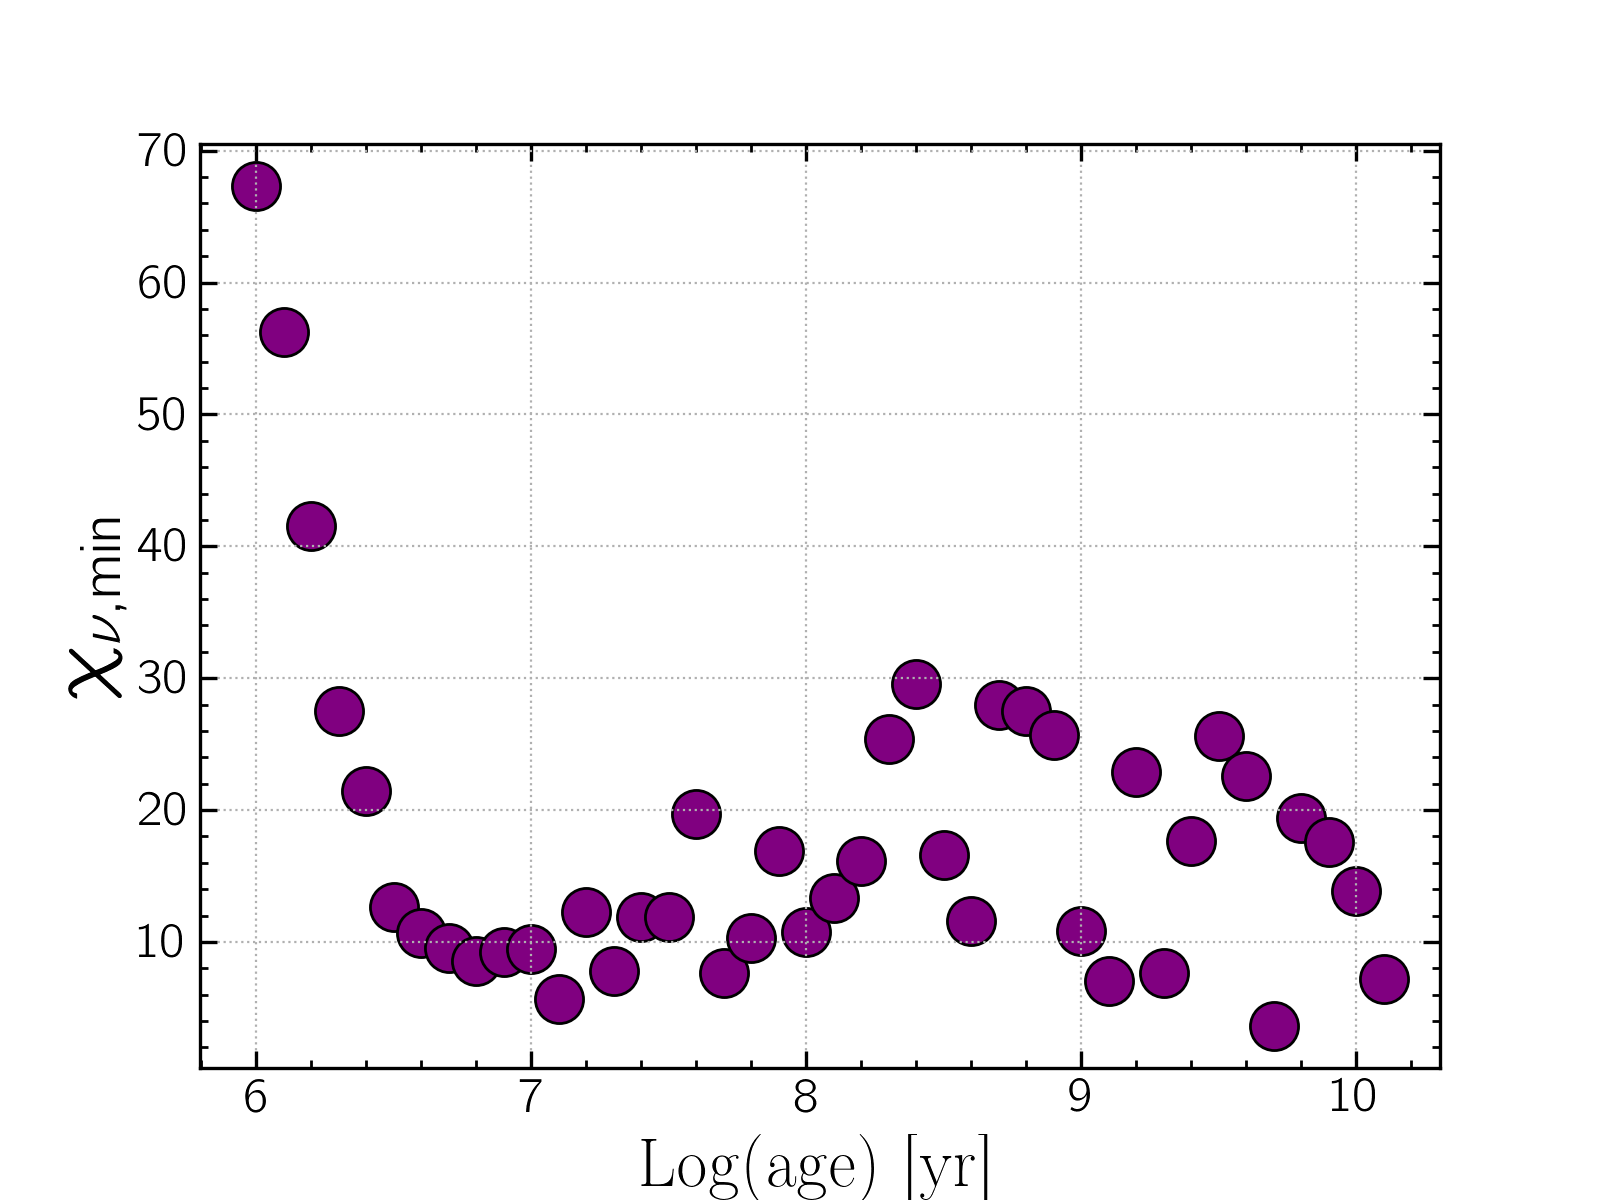

In [38]:
%matplotlib inline
plt.scatter(ages,chimins/6, color='purple', edgecolor='black',s=300)
plt.xlabel('Log(age) [yr]',fontsize=25)
plt.ylabel(r'$\chi_{\nu,\mathrm{min}}$', fontsize=30)
plt.grid(ls=':')

In [30]:
age = ages[-5]
ind = np.where(parsec['logAge'] == age)
parsec_temp = parsec.loc[ind]
parsec_temp = parsec_temp.reset_index(drop=True)
parsec_temp

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
0,0.000155,-2.0,9.7,0.093634,1.115611,0.094,-3.059,3.5119,5.467,1,...,12.417,19.195,15.303,13.345,12.347,11.804,0.998,1.958,6.208819e+05,36304.070244
1,0.000155,-2.0,9.7,0.100063,1.171628,0.100,-2.860,3.5397,5.408,1,...,11.919,17.615,14.338,12.573,11.815,11.373,0.758,1.765,5.296326e+05,28177.357212
2,0.000155,-2.0,9.7,0.103569,1.200243,0.103,-2.756,3.5541,5.377,1,...,11.661,16.855,13.850,12.203,11.536,11.142,0.667,1.647,4.863914e+05,24408.512883
3,0.000155,-2.0,9.7,0.123439,1.341567,0.123,-2.482,3.5820,5.290,1,...,10.975,15.305,12.753,11.354,10.814,10.496,0.540,1.399,3.908900e+05,15965.855131
4,0.000155,-2.0,9.7,0.143309,1.456032,0.143,-2.310,3.5955,5.238,1,...,10.546,14.513,12.148,10.869,10.373,10.083,0.496,1.279,3.403221e+05,11703.248575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,0.041619,0.5,9.7,1.328020,2.522580,0.826,3.595,3.3705,-0.807,8,...,-4.219,12.082,8.223,4.607,1.060,-1.191,3.547,3.616,1.521766e+05,91272.278696
1574,0.041619,0.5,9.7,1.328020,2.522580,0.797,3.630,3.3623,-0.890,8,...,-4.305,12.398,8.375,4.695,1.073,-1.213,3.622,3.680,1.576605e+05,91306.562296
1575,0.041619,0.5,9.7,1.328021,2.522580,0.765,3.644,3.3582,-0.937,8,...,-4.341,12.504,8.420,4.716,1.075,-1.222,3.641,3.704,1.593892e+05,91377.283317
1576,0.041619,0.5,9.7,1.328022,2.522580,0.732,3.651,3.3562,-0.971,8,...,-4.356,12.549,8.439,4.723,1.076,-1.226,3.647,3.716,1.601108e+05,91411.514011


<IPython.core.display.Javascript object>


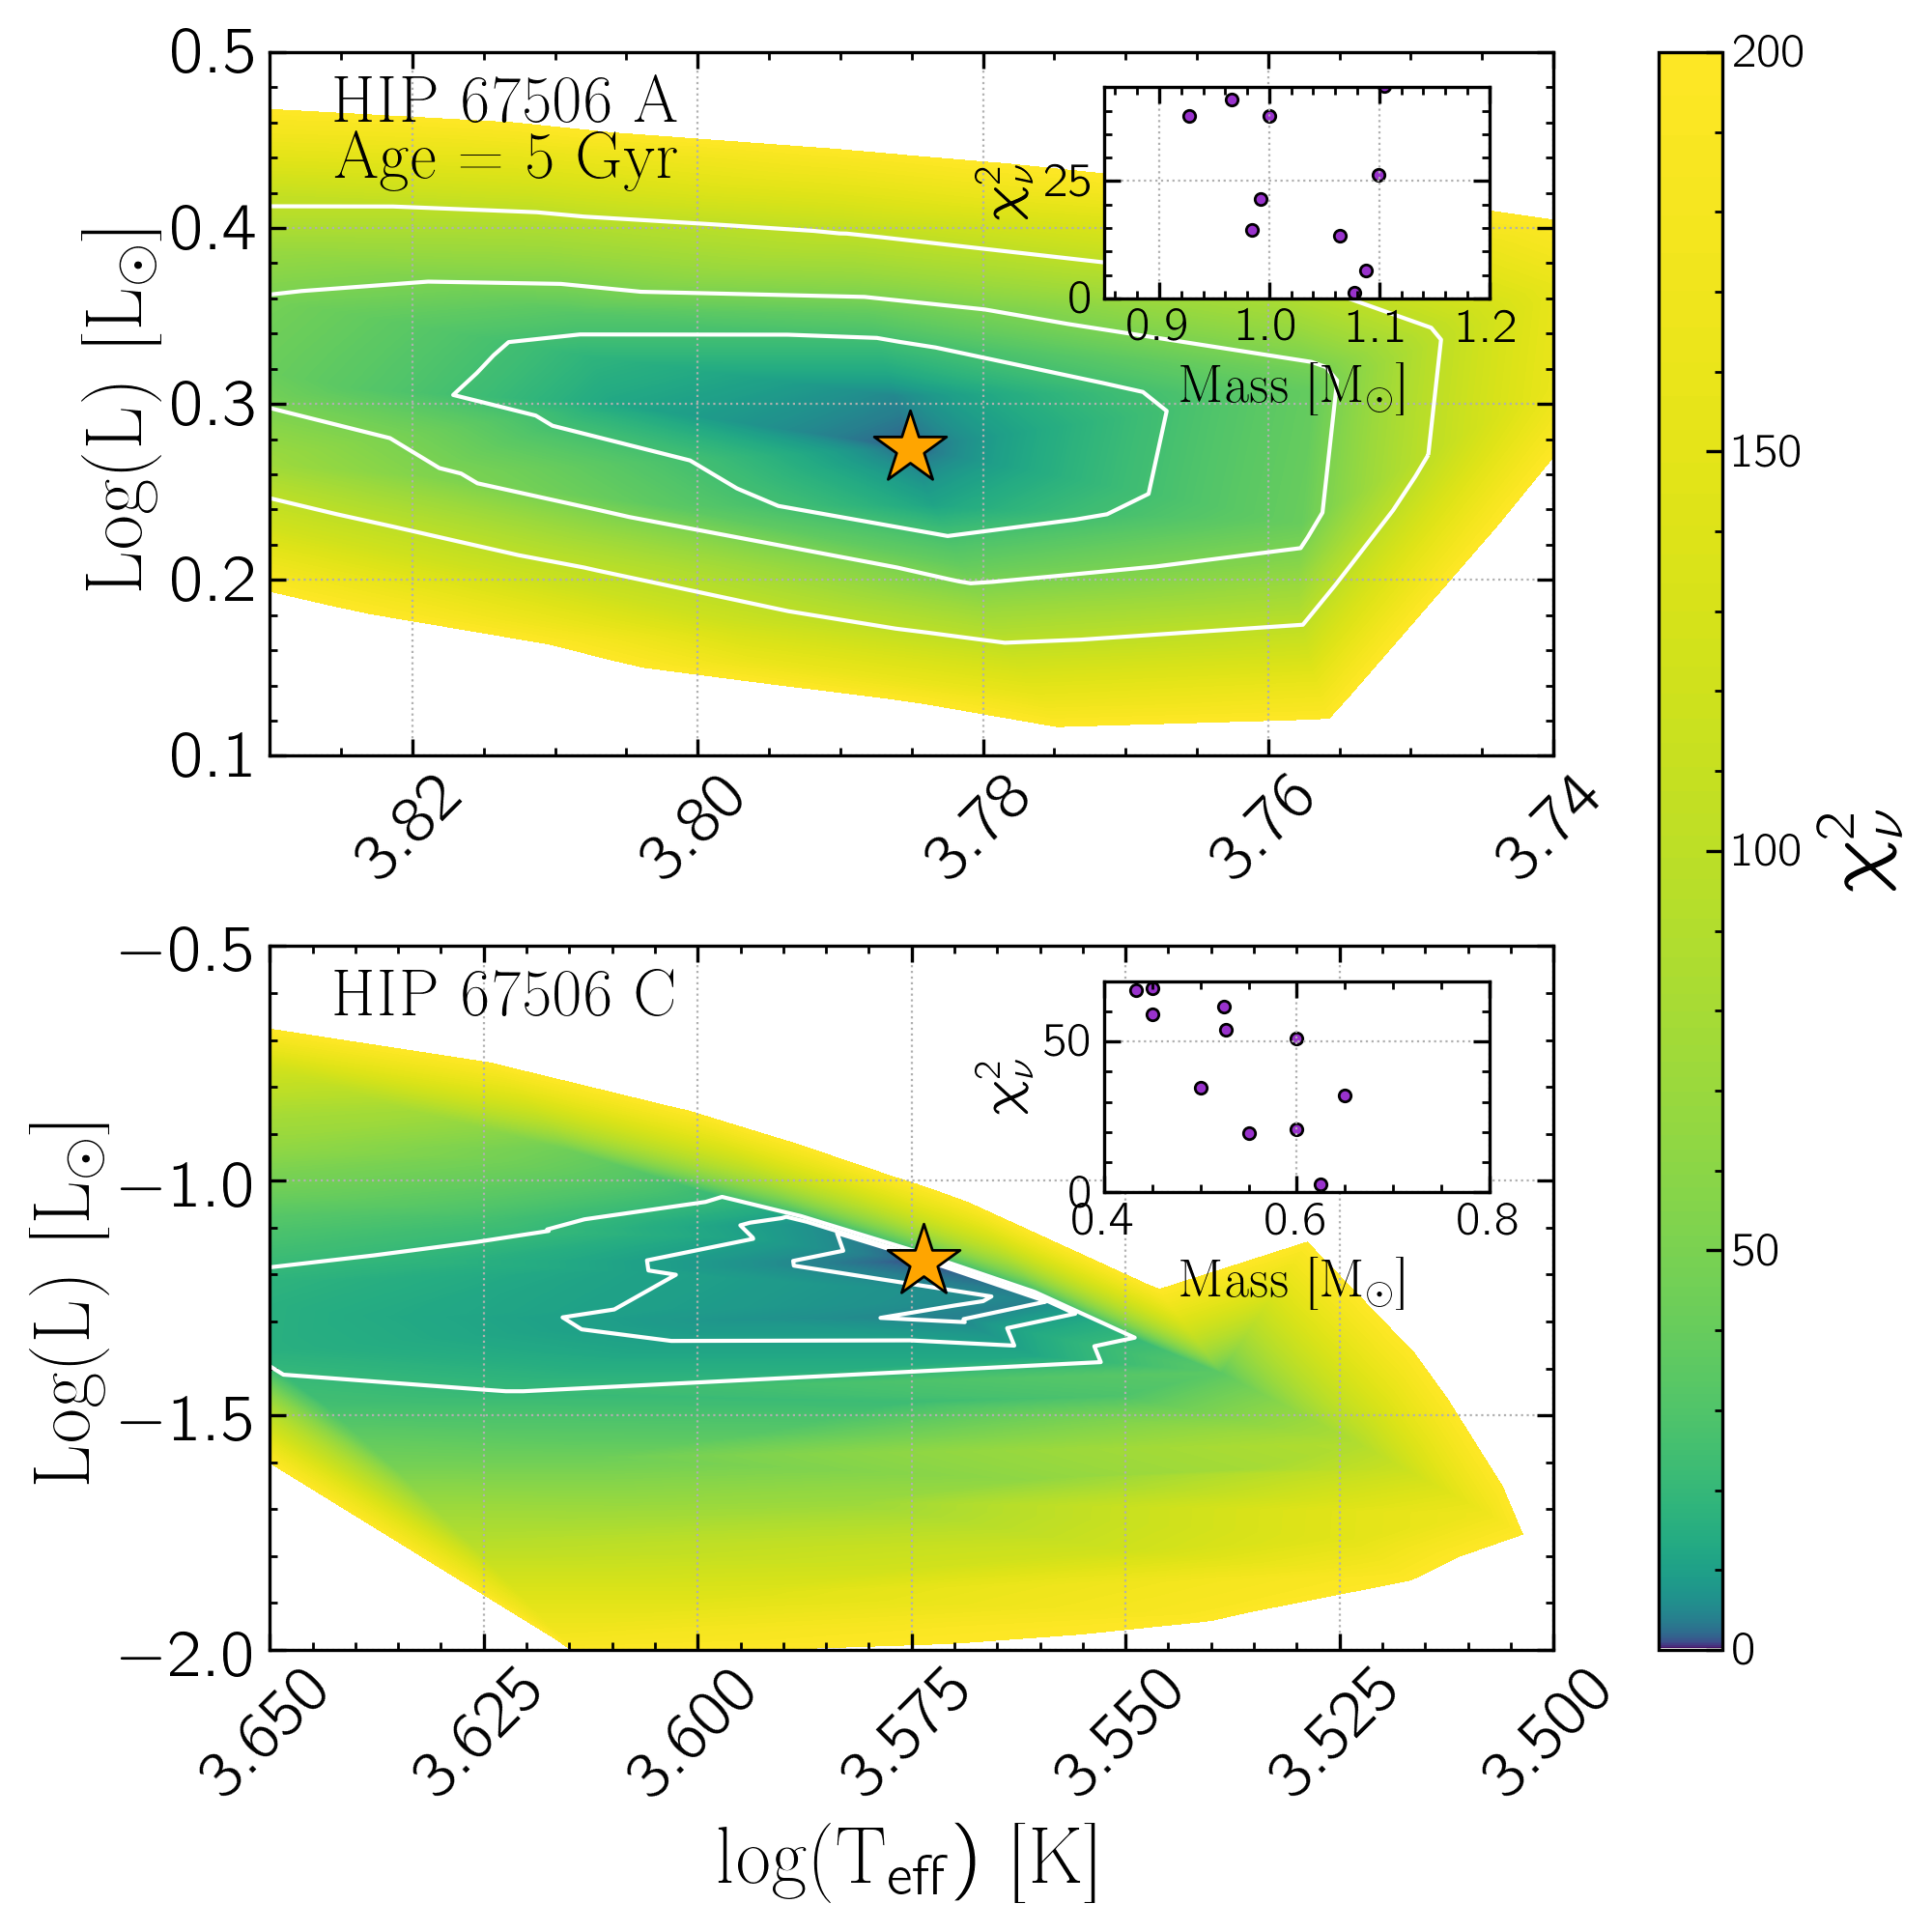

In [31]:
age = 9.7
summedchi = pickle.load(open('chi2-matrix-constrainedage-'+
                               str(age)+'.pkl','rb'))
a = np.where(summedchi == np.min(summedchi))
C_index_min = a[0]
A_index_min = a[1]


import matplotlib
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.gridspec import GridSpec
l_f = LogFormatter(10)


plt.style.use('magrathea')
%matplotlib inline
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows = 2, ncols = 2, width_ratios = [1, 0.05], height_ratios = [1,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
cax = fig.add_subplot(gs[:,1])
#ax_main = 

ax1.grid(ls=':')
levels = np.linspace(0,200,1000)
im = ax1.tricontourf(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['A chi2']/6, 
                     levels = levels, cmap = 'twilight', 
                norm=matplotlib.colors.LogNorm())
cbarticks = [0,50,100,150,200]
#cbar = plt.colorbar(im, ticks=cbarticks, ax=cax)
#fig.colorbar(im, ax=[ax1,ax2])
cbar = fig.colorbar(im, cax=cax, ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = ax1.tricontour(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['A chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax1.scatter(parsec_temp['logTe'][A_index_min], parsec_temp['logL'][A_index_min], 
            color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('Age = '+str(int(np.round(
                    (10**(age)/1e9), 
                    decimals=0))) + ' Gyr',
             xy = (0.05,0.82), xycoords = 'axes fraction', fontsize=25)

ax1.set_xlim(3.74,3.83)
ax1.set_ylim(0.1,0.5)
ax1.invert_xaxis()
cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
#ax1.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax1.tick_params(axis='x', labelsize=25, rotation=45)
#plt.xticks(fontsize=25, rotation=45)
ax1.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
#plt.yticks(fontsize=25)
ax1.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax1
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(parsec_temp['Mass'], parsec_temp['A chi2']/5, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.85,1.2)
axins.set_ylim(0,45)

##################################### ax2
ax2.grid(ls=':')
levels = np.linspace(0,1000,1000)
im = ax2.tricontourf(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['C chi2']/6, 
                     levels = levels, cmap = 'twilight', 
                norm=matplotlib.colors.LogNorm())
#cbarticks = [100,500,1000]
#cbar = plt.colorbar(im,ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = ax2.tricontour(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['C chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax2.scatter(parsec_temp['logTe'][C_index_min], parsec_temp['logL'][C_index_min], 
            color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')

ax2.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)

ax2.set_xlim(3.5,3.65)
ax2.set_ylim(-2,-0.5)
ax2.invert_xaxis()
#cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
ax2.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax2.tick_params(axis='x', labelsize=25, rotation=45)
ax2.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
ax2.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax2
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(parsec_temp['Mass'], parsec_temp['C chi2']/6, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.4,0.8)
axins.set_ylim(0,70)
             


plt.tight_layout()

#plt.savefig('PARSEC_models_chi2MAP_BOTH_primaryas_M0V-mh_m05_wchi2plot-WAgesConstrained-97.png',
#           dpi=300,
#           bbox_inches = 'tight')

In [36]:
print('Age: ',(10**age)/1e9,'Gyr')
print('A:')
print(' Teff:',10**parsec_temp['logTe'][A_index_min].item(),', LogL ', parsec_temp['logL'][A_index_min].item())
print('C:')
print(' Teff:',10**parsec_temp['logTe'][C_index_min].item(),', LogL ', parsec_temp['logL'][C_index_min].item())

Age:  5.011872336272715 Gyr
A:
 Teff: 6096.772644572435 , LogL  0.275
C:
 Teff: 3746.277983440598 , LogL  -1.172


<IPython.core.display.Javascript object>


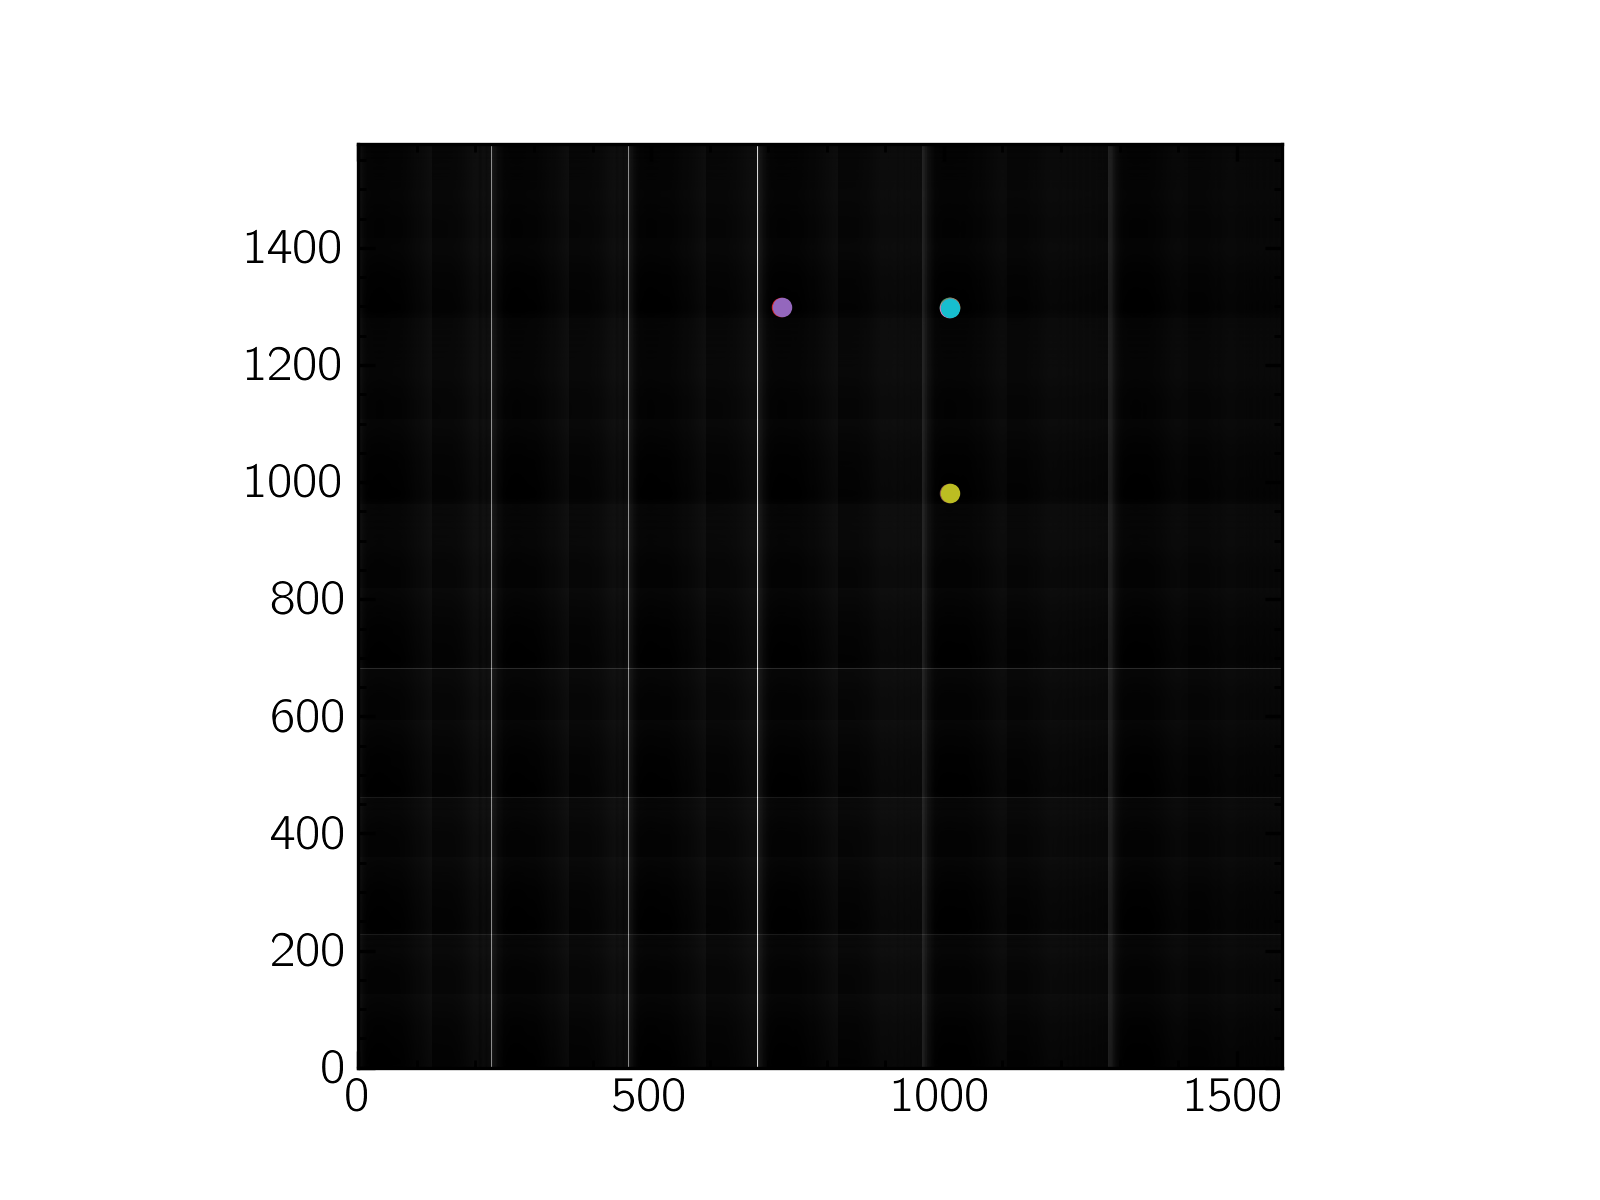

In [21]:


a = np.sort(np.reshape(summedchi,np.shape(summedchi)[0]*np.shape(summedchi)[1]))
np.where(summedchi == a[1])


%matplotlib notebook
plt.imshow(summedchi)
for i in range(10):
    ind = np.where(summedchi == a[i])
    plt.scatter(ind[1],ind[0])

In [22]:
ind = np.where(summedchi == a[1])
parsec_temp.loc[ind[1]]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
1010,0.01471,0.0,9.7,1.089345,2.489869,1.088,0.305,3.7862,4.267,1,...,4.008,5.428,4.257,3.88,3.808,3.821,0.072,0.377,29.719517,28968.240556


In [23]:
parsec_temp.loc[ind[0]]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
1299,0.041619,0.5,9.7,0.624793,2.337161,0.625,-1.172,3.5736,4.652,1,...,7.7,12.741,9.979,8.787,7.791,7.272,0.996,1.192,151421.310998,16.116708


<IPython.core.display.Javascript object>


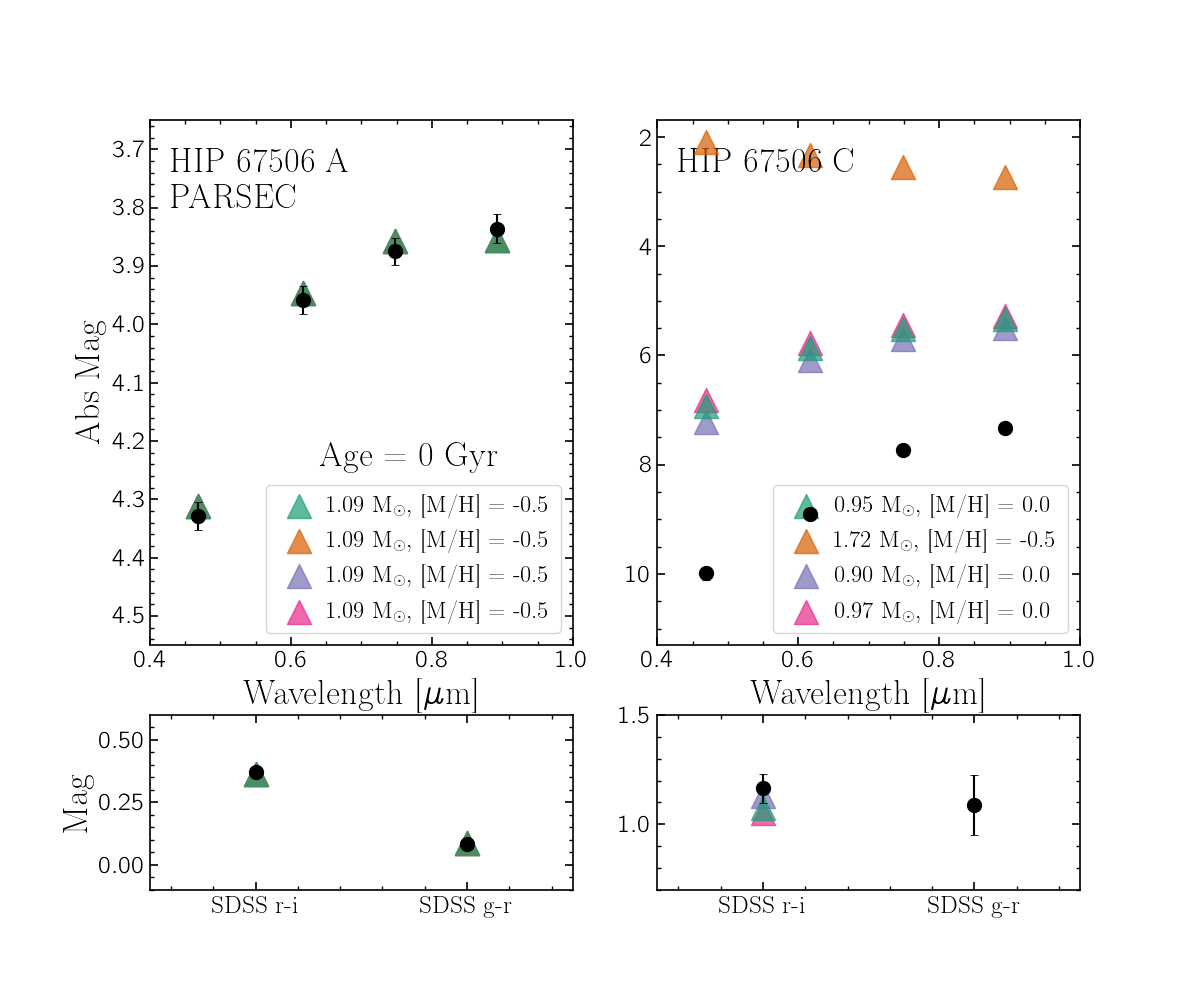

In [172]:
from matplotlib.gridspec import GridSpec
SDSS_filters = {'z':0.8931,'i':0.7481,'r':0.6165,'g':.4686}
f = [SDSS_filters['g'],SDSS_filters['r'],SDSS_filters['i'],SDSS_filters['z']]
filtercolumnnames = ['gmag','rmag','imag','zmag']
colorcolumnnames = ['g-r','r-i']

a = np.sort(np.reshape(summedchi,np.shape(summedchi)[0]*np.shape(summedchi)[1]))
Cinds = [1299, 981, 1298, 1300]

N = 8
cmap = matplotlib.cm.get_cmap('Dark2')
colors = cmap(np.linspace(0,1,N))

%matplotlib inline
fig = plt.figure(figsize=(12,10))
gs = GridSpec(nrows = 2, ncols = 2, height_ratios=[3, 1], width_ratios = [1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax3 = fig.add_subplot(gs[1])
ax4 = fig.add_subplot(gs[3])

alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        ind = np.where(summedchi == a[j])
        A = parsec_temp.loc[ind[1]]
        if i == 0:
            ax1.scatter(f[i],A[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(A['Mass'].item()) + ' M$_\odot$, [M/H] = '+ str(A['MH'].item())
                        , zorder=8)
        else:
            ax1.scatter(f[i],A[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)

color = 'black'
for i in range(4):
    ax1.scatter(f[i],AM[i], zorder=10, color=color, s=100)
    ax1.errorbar(f[i],AM[i],yerr = eAM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
    
ax1.invert_yaxis()
ax1.set_xlim(0.4,1)
ax1.set_ylim(bottom = 4.55, top = 3.65)
ax1.set_ylabel('Abs Mag', fontsize=25)
ax1.set_xlabel('Wavelength [$\mu$m]', fontsize=25)

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('PARSEC',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)

ax1.annotate('Age = '+str(int(np.round(
                    (10**(age)/1e9), 
                    decimals=0))) + ' Gyr',
             xy = (0.4,0.34), xycoords = 'axes fraction', fontsize=25)

handles, labels = ax1.get_legend_handles_labels()
A_legend = ax1.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=17)



alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        ind = np.where(summedchi == a[j])
        C = parsec_temp.loc[Cinds[j]]
        if i == 0:
            ax3.scatter(f[i],C[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(C['Mass'].item()) + ' M$_\odot$, [M/H] = '+ str(C['MH'].item())
                        , zorder=8)
        else:
            ax3.scatter(f[i],C[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)
color = 'black'
for i in range(4):
    ax3.scatter(f[i],CM[i], zorder=10, color=color, s=100)
    ax3.errorbar(f[i],CM[i],yerr = eCM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)

handles, labels = ax3.get_legend_handles_labels()
C_legend = ax3.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=17)   

ax3.invert_yaxis()
ax3.set_ylim(bottom = 11.3)
ax3.set_xlim(0.4,1)
ax3.set_xlabel('Wavelength [$\mu$m]',fontsize=25)
ax3.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)

            
                   
zorder = [8,6,4,2]

i = 0
ax2.scatter(0,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(0,Acolorlist[i],yerr = eAcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 1
ax2.scatter(1,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(1,Acolorlist[i],yerr = eAcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ind = np.where(summedchi == a[j])
    A = parsec_temp.loc[ind[1]]
    ax2.scatter(0,A[colorcolumnnames[0]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
    ax2.scatter(1,A[colorcolumnnames[1]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
        
ax2.set_xlim(-0.5,1.5)
ax2.set_ylim(-0.1,0.6)
ax2.set_ylabel('Mag', fontsize=25)
ax2.set_xticks([0,1], labels = ['SDSS '+colorcolumnnames[::-1][k] for k in range(2)])


zorder = [8,6,4,2]
i = 1
ax4.scatter(0,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(0,Ccolorlist[i],yerr = eCcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 0
ax4.scatter(1,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(1,Ccolorlist[i],yerr = eCcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ind = np.where(summedchi == a[j])
    C = parsec_temp.loc[Cinds[j]]
    ax4.scatter(0,C[colorcolumnnames[0]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
    ax4.scatter(1,C[colorcolumnnames[1]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
        

ax4.set_xticks([0,1], labels = ['SDSS '+colorcolumnnames[::-1][k] for k in range(2)])
ax4.set_xlim(-0.5,1.5)
ax4.set_ylim(0.7,1.5)

#plt.savefig('best_best_final_plots/PARSEC-photometry-color-fitting-constrainedage-97.png',
#            dpi=300, bbox_inches='tight')


<IPython.core.display.Javascript object>


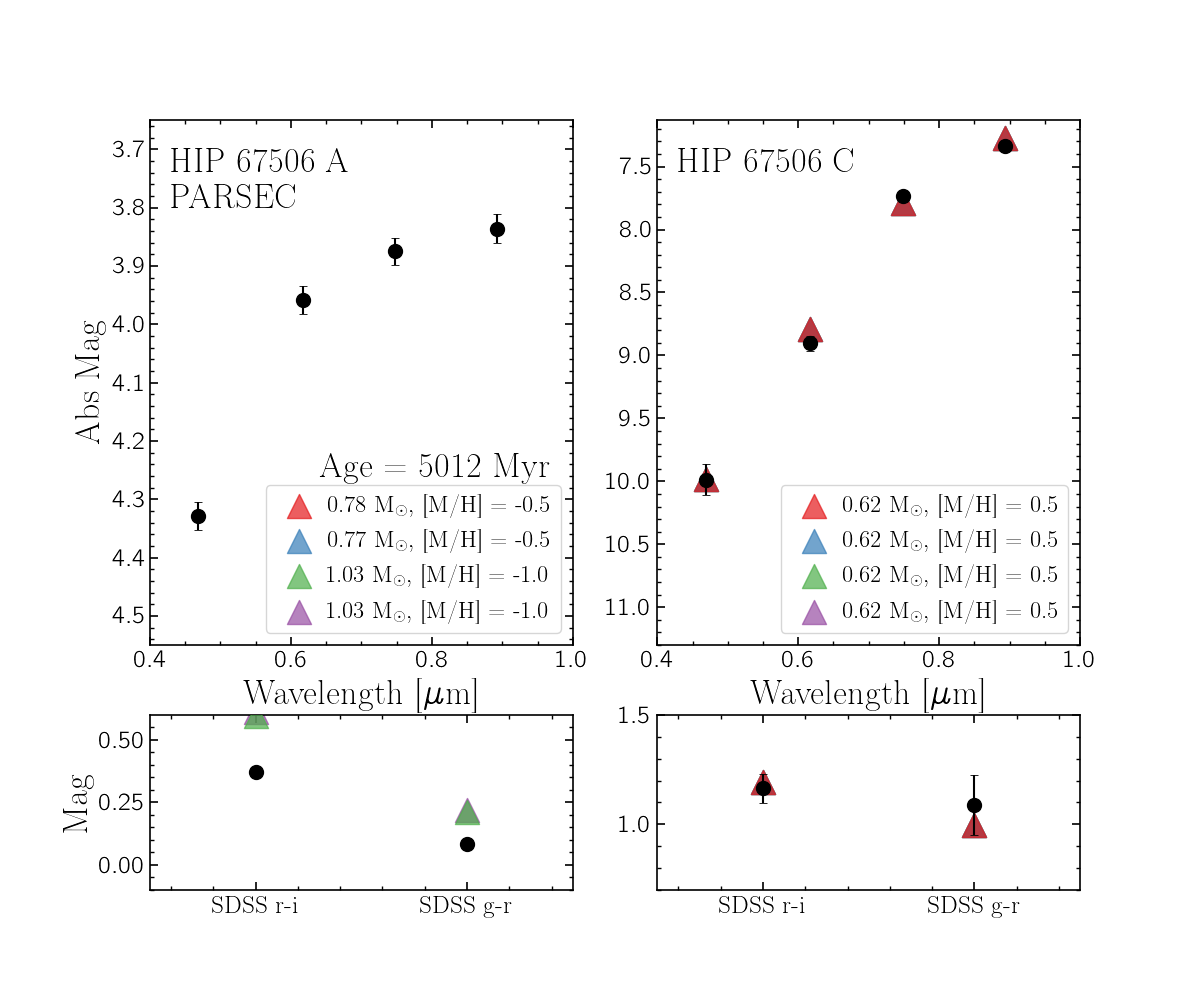

In [178]:
age = 9.7
ind = np.where(parsec['logAge'] == age)
parsec_temp = parsec.loc[ind]
parsec_temp = parsec_temp.reset_index(drop=True)

summedchi = pickle.load(open('chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))
a = np.where(summedchi == np.min(summedchi))
C_index_min = a[0]
A_index_min = a[1]


import matplotlib
from matplotlib.gridspec import GridSpec
SDSS_filters = {'z':0.8931,'i':0.7481,'r':0.6165,'g':.4686}
f = [SDSS_filters['g'],SDSS_filters['r'],SDSS_filters['i'],SDSS_filters['z']]
filtercolumnnames = ['gmag','rmag','imag','zmag']
colorcolumnnames = ['g-r','r-i']

a = np.sort(np.reshape(summedchi,np.shape(summedchi)[0]*np.shape(summedchi)[1]))
Cinds = [1299, 981, 1298, 1300]

N = 8
cmap = matplotlib.cm.get_cmap('Set1')
colors = cmap(np.linspace(0,1,N))

%matplotlib notebook
fig = plt.figure(figsize=(12,10))
gs = GridSpec(nrows = 2, ncols = 2, height_ratios=[3, 1], width_ratios = [1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax3 = fig.add_subplot(gs[1])
ax4 = fig.add_subplot(gs[3])

alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        ind = np.where(summedchi == a[j])
        A = parsec_temp.loc[Ainds[j]]
        if i == 0:
            ax1.scatter(f[i],A[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(A['Mass'].item()) + ' M$_\odot$, [M/H] = '+ str(A['MH'].item())
                        , zorder=8)
        else:
            ax1.scatter(f[i],A[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)

color = 'black'
for i in range(4):
    ax1.scatter(f[i],AM[i], zorder=10, color=color, s=100)
    ax1.errorbar(f[i],AM[i],yerr = eAM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
    
ax1.invert_yaxis()
ax1.set_xlim(0.4,1)
ax1.set_ylim(bottom = 4.55, top = 3.65)
ax1.set_ylabel('Abs Mag', fontsize=25)
ax1.set_xlabel('Wavelength [$\mu$m]', fontsize=25)

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('PARSEC',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('Age = '+str(int(np.round(
                    (10**(age)/1e6), 
                    decimals=0))) + ' Myr',
             xy = (0.4,0.32), xycoords = 'axes fraction', fontsize=25)

handles, labels = ax1.get_legend_handles_labels()
A_legend = ax1.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=17)



alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        ind = np.where(summedchi == a[j])
        C = parsec_temp.loc[ind[0]]
        if i == 0:
            ax3.scatter(f[i],C[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(C['Mass'].item()) + ' M$_\odot$, [M/H] = '+ str(C['MH'].item())
                        , zorder=8)
        else:
            ax3.scatter(f[i],C[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)
color = 'black'
for i in range(4):
    ax3.scatter(f[i],CM[i], zorder=10, color=color, s=100)
    ax3.errorbar(f[i],CM[i],yerr = eCM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
    


handles, labels = ax3.get_legend_handles_labels()
C_legend = ax3.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=17)   

ax3.invert_yaxis()
ax3.set_ylim(bottom = 11.3)
ax3.set_xlim(0.4,1)
ax3.set_xlabel('Wavelength [$\mu$m]',fontsize=25)
ax3.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)


            
                   
zorder = [8,6,4,2]

i = 0
ax2.scatter(0,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(0,Acolorlist[i],yerr = eAcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 1
ax2.scatter(1,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(1,Acolorlist[i],yerr = eAcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ind = np.where(summedchi == a[j])
    A = parsec_temp.loc[Ainds[j]]
    ax2.scatter(0,A[colorcolumnnames[0]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
    ax2.scatter(1,A[colorcolumnnames[1]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
        
ax2.set_xlim(-0.5,1.5)
ax2.set_ylim(-0.1,0.6)
ax2.set_ylabel('Mag', fontsize=25)
ax2.set_xticks([0,1], labels = ['SDSS '+colorcolumnnames[::-1][k] for k in range(2)])


zorder = [8,6,4,2]
i = 1
ax4.scatter(0,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(0,Ccolorlist[i],yerr = eCcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 0
ax4.scatter(1,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(1,Ccolorlist[i],yerr = eCcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ind = np.where(summedchi == a[j])
    C = parsec_temp.loc[ind[0]]
    ax4.scatter(0,C[colorcolumnnames[0]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
    ax4.scatter(1,C[colorcolumnnames[1]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
        

ax4.set_xticks([0,1], labels = ['SDSS '+colorcolumnnames[::-1][k] for k in range(2)])
ax4.set_xlim(-0.5,1.5)
ax4.set_ylim(0.7,1.5)

plt.savefig('best_best_final_plots/PARSEC-photometry-color-fitting-constrainedage-97.png',
            dpi=300, bbox_inches='tight')


In [98]:
a = np.sort(np.reshape(summedchi,np.shape(summedchi)[0]*np.shape(summedchi)[1]))
Cinds = np.array([])
Cinds_a = np.array([])
for j in range(17)[::-1]:
    #print(a[j])
    ind = np.where(summedchi == a[j])
    C = parsec_temp.loc[ind[0]]
    Cinds = np.append(Cinds,ind[0])
    Cinds_a = np.append(Cinds_a,summedchi[ind])
    print
for i in range(len(Cinds)):
    print(Cinds[i],Cinds_a[i])

1299.0 209.38378814550313
1299.0 209.2355923465332
1300.0 197.74388483236606
1298.0 197.10170148254502
1298.0 191.82938123784754
981.0 190.48087392880598
981.0 185.20855368410852
1298.0 154.67433882884194
981.0 148.0535112751029
1299.0 147.93289651267966
1298.0 130.56167648958464
981.0 123.94084893584562
1299.0 121.79497704596277
1299.0 88.26513616294291
1299.0 82.99281591824544
1299.0 45.83777350923982
1299.0 21.72511116998254


# Age = 7.1

In [173]:
age = ages[11]
ind = np.where(parsec['logAge'] == age)
parsec_temp = parsec.loc[ind]
parsec_temp = parsec_temp.reset_index(drop=True)
parsec_temp

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
0,0.000155,-2.0,7.1,0.093634,1.115611,0.094,-1.863,3.5717,4.510,0,...,9.427,13.847,11.299,9.886,9.319,8.979,0.567,1.413,252237.583016,4131.115506
1,0.000155,-2.0,7.1,0.096576,1.141850,0.096,-1.845,3.5732,4.512,0,...,9.383,13.766,11.237,9.835,9.273,8.936,0.562,1.402,247888.217659,3896.296007
2,0.000155,-2.0,7.1,0.102812,1.194175,0.103,-1.808,3.5763,4.513,0,...,9.289,13.595,11.103,9.726,9.174,8.844,0.552,1.377,238661.415852,3417.775176
3,0.000155,-2.0,7.1,0.103569,1.200243,0.103,-1.803,3.5767,4.514,0,...,9.278,13.575,11.088,9.714,9.163,8.834,0.551,1.374,237649.260774,3367.260133
4,0.000155,-2.0,7.1,0.104736,1.209494,0.104,-1.797,3.5772,4.515,0,...,9.263,13.547,11.065,9.696,9.146,8.818,0.550,1.369,236095.617796,3288.872401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,0.041619,0.5,7.1,14.263937,2.628852,12.198,4.902,3.5001,-0.425,3,...,-7.485,0.398,-1.089,-2.766,-5.425,-6.799,2.659,1.677,504517.657740,310607.236435
1877,0.041619,0.5,7.1,14.266432,2.628853,12.189,4.946,3.4942,-0.493,3,...,-7.594,0.352,-0.876,-2.636,-5.290,-6.746,2.654,1.760,491435.665238,306072.769455
1878,0.041619,0.5,7.1,14.269164,2.628855,12.177,4.984,3.4888,-0.554,3,...,-7.691,0.285,-0.725,-2.553,-5.182,-6.702,2.629,1.828,481675.738716,302595.200879
1879,0.041619,0.5,7.1,14.272759,2.628856,12.163,5.024,3.4836,-0.615,3,...,-7.791,0.217,-0.699,-2.595,-5.165,-6.713,2.570,1.896,481640.584450,302777.131540


<IPython.core.display.Javascript object>


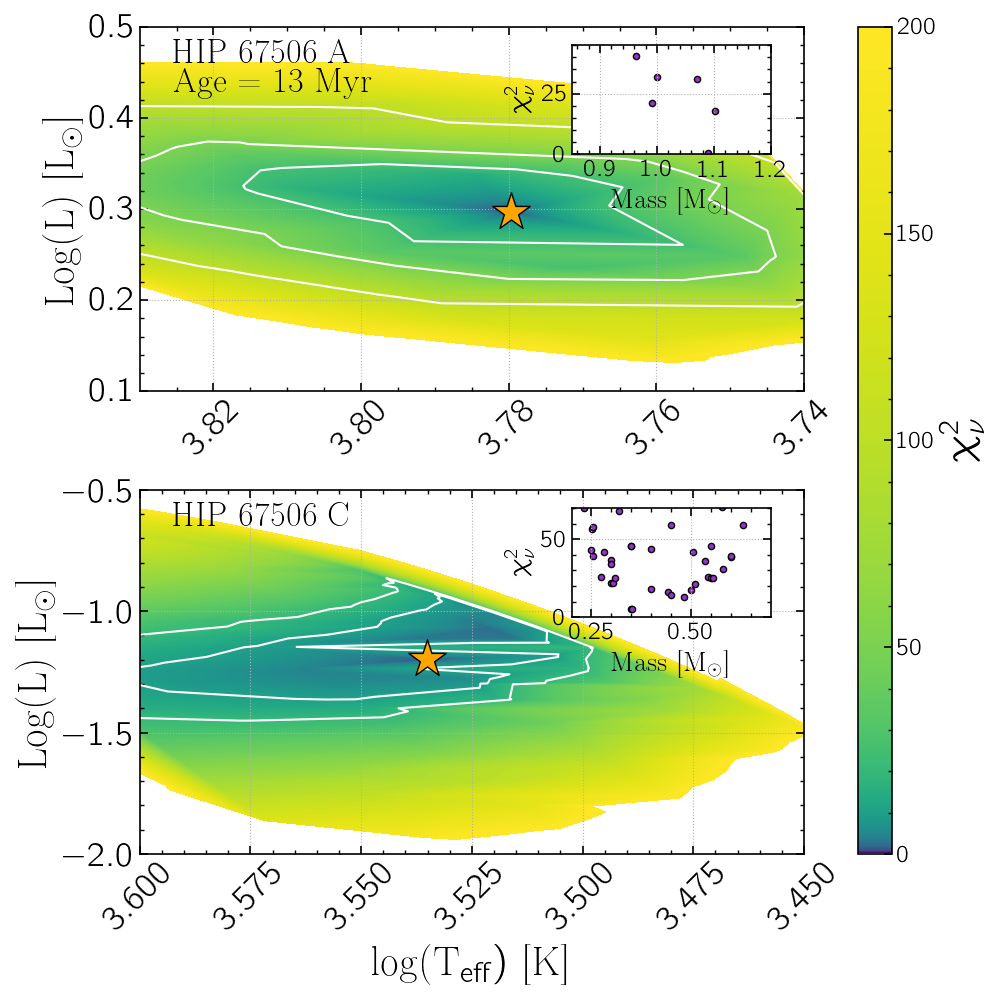

In [174]:
import matplotlib
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.gridspec import GridSpec
l_f = LogFormatter(10)

summedchi = pickle.load(open('chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))

a = np.where(summedchi == np.min(summedchi))
A_index_min = a[1][0]
C_index_min = a[0][0]


plt.style.use('magrathea')
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
gs = GridSpec(nrows = 2, ncols = 2, width_ratios = [1, 0.05], height_ratios = [1,1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
cax = fig.add_subplot(gs[:,1])
#ax_main = 

ax1.grid(ls=':')
levels = np.linspace(0,200,1000)
im = ax1.tricontourf(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['A chi2']/6, 
                     levels = levels, cmap = 'viridis', 
                norm=matplotlib.colors.LogNorm())
cbarticks = [0,50,100,150,200]
#cbar = plt.colorbar(im, ticks=cbarticks, ax=cax)
#fig.colorbar(im, ax=[ax1,ax2])
cbar = fig.colorbar(im, cax=cax, ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [25, 50, 100]
CS = ax1.tricontour(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['A chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax1.scatter(parsec_temp['logTe'][A_index_min], parsec_temp['logL'][A_index_min], 
            color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('Age = '+str(int(np.round(
                    (10**(age)/1e6), 
                    decimals=0))) + ' Myr',
             xy = (0.05,0.82), xycoords = 'axes fraction', fontsize=25)

ax1.set_xlim(3.74,3.83)
ax1.set_ylim(0.1,0.5)
ax1.invert_xaxis()
cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
#ax1.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax1.tick_params(axis='x', labelsize=25, rotation=45)
#plt.xticks(fontsize=25, rotation=45)
ax1.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
#plt.yticks(fontsize=25)
ax1.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax1
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(parsec_temp['Mass'], parsec_temp['A chi2']/5, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.85,1.2)
axins.set_ylim(0,45)

##################################### ax2
ax2.grid(ls=':')
levels = np.linspace(0,1000,1000)
im = ax2.tricontourf(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['C chi2']/6, 
                     levels = levels, cmap = 'viridis', 
                norm=matplotlib.colors.LogNorm())
#cbarticks = [100,500,1000]
#cbar = plt.colorbar(im,ticks=cbarticks)
#levels = [(mist['chi2'][ind[0]])/6+1,25, 50, 100]
clevels = [50, 100]
CS = ax2.tricontour(parsec_temp['logTe'], parsec_temp['logL'], parsec_temp['C chi2']/6, levels = clevels, 
               colors=['w']*len(clevels))
#plt.clabel(CS, CS.levels, inline=True, fontsize=15, inline_spacing=0.5, use_clabeltext=True)

ax2.scatter(parsec_temp['logTe'][C_index_min], parsec_temp['logL'][C_index_min], 
            color='orange', marker = '*',
            s=800, zorder=10, 
            edgecolors = 'black')

ax2.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)

ax2.set_xlim(3.45,3.6)
ax2.set_ylim(-2,-0.5)
ax2.invert_xaxis()
#cbar.set_label(r'$\chi_\nu^2$',fontsize=30)
ax2.set_xlabel('log(T$_{\mathrm{eff}})$ [K]', fontsize=30)
ax2.tick_params(axis='x', labelsize=25, rotation=45)
ax2.set_ylabel('Log(L) [L$_{\odot}$]',fontsize=30)
ax2.tick_params(axis='y', labelsize=25)

######################## inset axes #######
ax = ax2
axins = ax.inset_axes([0.65, 0.65, 0.3, 0.3])
axins.scatter(parsec_temp['Mass'], parsec_temp['C chi2']/6, 
              marker="o", ls='None', s=20, color='darkorchid',edgecolor='black')
axins.grid(ls=':')
axins.set_xlabel('Mass [M$_\odot$]')
axins.set_ylabel(r'$\chi_\nu^2$')
axins.set_xlim(0.2,0.7)
axins.set_ylim(0,70)
             


plt.tight_layout()

#plt.savefig('PARSEC_models_chi2MAP_BOTH_primaryas_M0V-mh_m05_wchi2plot-WAgesConstrained-71.png',
#           dpi=300,
#           bbox_inches = 'tight')

In [175]:
a = np.sort(np.reshape(summedchi,np.shape(summedchi)[0]*np.shape(summedchi)[1]))
Ainds = np.array([])
Ainds_a = np.array([])
for j in range(35)[::-1]:
    ind = np.where(summedchi == a[j])
    print(ind)
    A = parsec_temp.loc[ind[1]]
    Ainds = np.append(Ainds,ind[1])
    Ainds_a = np.append(Ainds_a,summedchi[ind])
    
for i in range(len(Ainds)):
    print(Ainds[i],Ainds_a[i])
    


(array([1281]), array([634]))
(array([927]), array([634]))
(array([923]), array([956]))
(array([1278]), array([634]))
(array([1281]), array([957]))
(array([927]), array([957]))
(array([1626]), array([956]))
(array([925]), array([635]))
(array([926]), array([635]))
(array([1279]), array([634]))
(array([925]), array([955]))
(array([926]), array([955]))
(array([1278]), array([957]))
(array([1280]), array([634]))
(array([1279]), array([957]))
(array([1280]), array([957]))
(array([1623]), array([956]))
(array([598]), array([956]))
(array([1625]), array([956]))
(array([1624]), array([956]))
(array([924]), array([956]))
(array([925]), array([634]))
(array([926]), array([634]))
(array([600]), array([956]))
(array([1282]), array([956]))
(array([599]), array([956]))
(array([925]), array([957]))
(array([926]), array([957]))
(array([1281]), array([956]))
(array([927]), array([956]))
(array([1278]), array([956]))
(array([1279]), array([956]))
(array([1280]), array([956]))
(array([925]), array([956]

<IPython.core.display.Javascript object>


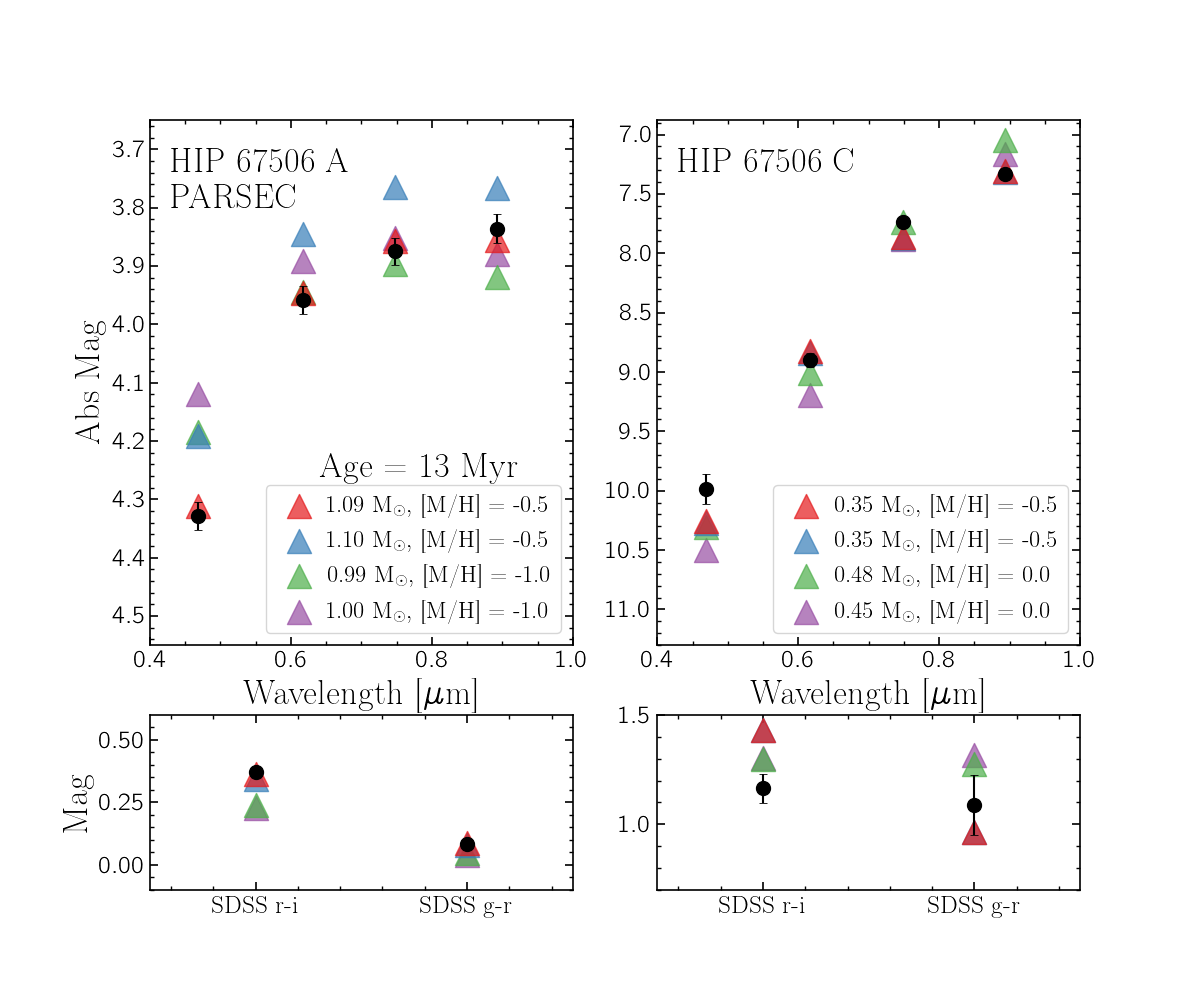

In [177]:
import matplotlib
from matplotlib.gridspec import GridSpec
SDSS_filters = {'z':0.8931,'i':0.7481,'r':0.6165,'g':.4686}
f = [SDSS_filters['g'],SDSS_filters['r'],SDSS_filters['i'],SDSS_filters['z']]
filtercolumnnames = ['gmag','rmag','imag','zmag']
colorcolumnnames = ['g-r','r-i']

a = np.sort(np.reshape(summedchi,np.shape(summedchi)[0]*np.shape(summedchi)[1]))
Ainds = [956,957,634,635]

N = 8
cmap = matplotlib.cm.get_cmap('Set1')
colors = cmap(np.linspace(0,1,N))

%matplotlib notebook
fig = plt.figure(figsize=(12,10))
gs = GridSpec(nrows = 2, ncols = 2, height_ratios=[3, 1], width_ratios = [1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2])

ax3 = fig.add_subplot(gs[1])
ax4 = fig.add_subplot(gs[3])

alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        ind = np.where(summedchi == a[j])
        A = parsec_temp.loc[Ainds[j]]
        if i == 0:
            ax1.scatter(f[i],A[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(A['Mass'].item()) + ' M$_\odot$, [M/H] = '+ str(A['MH'].item())
                        , zorder=8)
        else:
            ax1.scatter(f[i],A[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)

color = 'black'
for i in range(4):
    ax1.scatter(f[i],AM[i], zorder=10, color=color, s=100)
    ax1.errorbar(f[i],AM[i],yerr = eAM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
    
ax1.invert_yaxis()
ax1.set_xlim(0.4,1)
ax1.set_ylim(bottom = 4.55, top = 3.65)
ax1.set_ylabel('Abs Mag', fontsize=25)
ax1.set_xlabel('Wavelength [$\mu$m]', fontsize=25)

ax1.annotate('HIP 67506 A',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('PARSEC',xy = (0.05,0.83), xycoords = 'axes fraction', fontsize=25)
ax1.annotate('Age = '+str(int(np.round(
                    (10**(age)/1e6), 
                    decimals=0))) + ' Myr',
             xy = (0.4,0.32), xycoords = 'axes fraction', fontsize=25)

handles, labels = ax1.get_legend_handles_labels()
A_legend = ax1.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=17)



alpha = 0.7
for i in range(4):
    for j in range(4)[::-1]:
        ind = np.where(summedchi == a[j])
        C = parsec_temp.loc[ind[0]]
        if i == 0:
            ax3.scatter(f[i],C[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha, 
                    label='{:.2f}'.format(C['Mass'].item()) + ' M$_\odot$, [M/H] = '+ str(C['MH'].item())
                        , zorder=8)
        else:
            ax3.scatter(f[i],C[filtercolumnnames[i]], 
                    color=colors[j], marker='^', s=300, alpha = alpha)
color = 'black'
for i in range(4):
    ax3.scatter(f[i],CM[i], zorder=10, color=color, s=100)
    ax3.errorbar(f[i],CM[i],yerr = eCM[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
    


handles, labels = ax3.get_legend_handles_labels()
C_legend = ax3.legend(handles[::-1], labels[::-1], loc='lower right', fontsize=17)   

ax3.invert_yaxis()
ax3.set_ylim(bottom = 11.3)
ax3.set_xlim(0.4,1)
ax3.set_xlabel('Wavelength [$\mu$m]',fontsize=25)
ax3.annotate('HIP 67506 C',xy = (0.05,0.9), xycoords = 'axes fraction', fontsize=25)


            
                   
zorder = [8,6,4,2]

i = 0
ax2.scatter(0,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(0,Acolorlist[i],yerr = eAcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 1
ax2.scatter(1,Acolorlist[i], color='black', zorder=10, s=100)
ax2.errorbar(1,Acolorlist[i],yerr = eAcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ind = np.where(summedchi == a[j])
    A = parsec_temp.loc[Ainds[j]]
    ax2.scatter(0,A[colorcolumnnames[0]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
    ax2.scatter(1,A[colorcolumnnames[1]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder=zorder[j])
        
ax2.set_xlim(-0.5,1.5)
ax2.set_ylim(-0.1,0.6)
ax2.set_ylabel('Mag', fontsize=25)
ax2.set_xticks([0,1], labels = ['SDSS '+colorcolumnnames[::-1][k] for k in range(2)])


zorder = [8,6,4,2]
i = 1
ax4.scatter(0,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(0,Ccolorlist[i],yerr = eCcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)
i = 0
ax4.scatter(1,Ccolorlist[i], color='black', zorder=10, s=100)
ax4.errorbar(1,Ccolorlist[i],yerr = eCcolorlist[i], ls='None', capsize = 3, 
                 zorder=10, color=color)


for j in range(4):
    ind = np.where(summedchi == a[j])
    C = parsec_temp.loc[ind[0]]
    ax4.scatter(0,C[colorcolumnnames[0]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
    ax4.scatter(1,C[colorcolumnnames[1]], 
                color=colors[j], marker='^', s=300, alpha = alpha, zorder = zorder[j])
        

ax4.set_xticks([0,1], labels = ['SDSS '+colorcolumnnames[::-1][k] for k in range(2)])
ax4.set_xlim(-0.5,1.5)
ax4.set_ylim(0.7,1.5)

#plt.savefig('PARSEC-photometry-color-fitting-constrainedage-71.png',
#            dpi=300, bbox_inches='tight')


In [41]:
print('Age: ',(10**age)/1e6,'Myr')
print('A:')
print(' Teff:',10**parsec_temp['logTe'][A_index_min].item(),', LogL ', parsec_temp['logL'][A_index_min].item())
print('C:')
print(' Teff:',10**parsec_temp['logTe'][C_index_min].item(),', LogL ', parsec_temp['logL'][C_index_min].item())

Age:  12.589254117941662 Myr
A:
 Teff: 6021.434963870294 , LogL  0.297
C:
 Teff: 3428.467208333132 , LogL  -1.197


# Uncertainty:

In [24]:
def GetMinMax(arr, chopind, star, df=6, ylim=20, sigma = 1):
    sigmatochi = sigma**2
    x = arr['logTe'].loc[chopind]
    y = arr[star+' chi2'].loc[chopind]/df
    from scipy.interpolate import interp1d
    f = interp1d(x,y)

    xnew_teff = np.linspace(np.min(x),np.max(x),1000)
    ynew_teff = f(xnew_teff)
    sigmaind_teff = np.where(ynew_teff < np.min(ynew_teff)+sigmatochi)
    teffmin = np.min(xnew_teff[sigmaind_teff])
    teffmax = np.max(xnew_teff[sigmaind_teff])

    x2 = arr['logL'].loc[chopind]
    f2 = interp1d(x2,y)
    xnew_lum = np.linspace(np.min(x2),np.max(x2),1000)
    ynew_lum = f2(xnew_lum)
    sigmaind_lum = np.where(ynew_lum < np.min(ynew_lum)+sigmatochi)
    lummin = np.min(xnew_lum[sigmaind_lum])
    lummax = np.max(xnew_lum[sigmaind_lum])
    
    return teffmin, teffmax, lummin, lummax, xnew_teff, ynew_teff, xnew_lum, ynew_lum

In [16]:
parsec = pickle.load(open('parsec-model-fits.pkl','rb'))
ages = np.unique(parsec['logAge'])

age = ages[10]
ind = np.where(parsec['logAge'] == age)
parsec_temp = parsec.loc[ind]
parsec_temp = parsec_temp.reset_index(drop=True)
parsec_temp

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
0,0.000155,-2.0,7.0,0.093634,1.115611,0.094,-1.790,3.5707,4.434,0,...,9.245,13.675,11.127,9.713,9.143,8.801,0.570,1.414,237943.860775,3257.203606
1,0.000155,-2.0,7.0,0.094024,1.119155,0.094,-1.788,3.5709,4.434,0,...,9.240,13.664,11.119,9.706,9.137,8.796,0.569,1.413,237396.923341,3231.196839
2,0.000155,-2.0,7.0,0.100355,1.174066,0.100,-1.750,3.5740,4.436,0,...,9.145,13.493,10.984,9.596,9.037,8.702,0.559,1.388,228272.423106,2793.171550
3,0.000155,-2.0,7.0,0.103569,1.200243,0.103,-1.731,3.5756,4.437,0,...,9.097,13.407,10.917,9.541,8.987,8.655,0.554,1.376,223792.023661,2587.600908
4,0.000155,-2.0,7.0,0.111286,1.259016,0.111,-1.689,3.5788,4.440,0,...,8.993,13.224,10.773,9.422,8.878,8.553,0.544,1.351,214260.209739,2171.426263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,0.041619,0.5,7.0,16.896126,2.629857,13.528,5.071,3.4940,-0.573,3,...,-7.906,0.044,-1.174,-2.937,-5.592,-7.052,2.655,1.763,525640.742907,320246.960519
1779,0.041619,0.5,7.0,16.898718,2.629858,13.516,5.105,3.4894,-0.627,3,...,-7.993,-0.021,-1.040,-2.861,-5.496,-7.013,2.635,1.821,516555.436004,317070.581632
1780,0.041619,0.5,7.0,16.902300,2.629859,13.495,5.147,3.4843,-0.690,3,...,-8.098,-0.094,-1.022,-2.909,-5.487,-7.031,2.578,1.887,517364.763823,317598.576242
1781,0.041619,0.5,7.0,16.907555,2.629861,13.468,5.194,3.4790,-0.759,3,...,-8.216,-0.179,-1.021,-2.972,-5.495,-7.065,2.523,1.951,520101.120844,318895.858388


3.7243


<IPython.core.display.Javascript object>


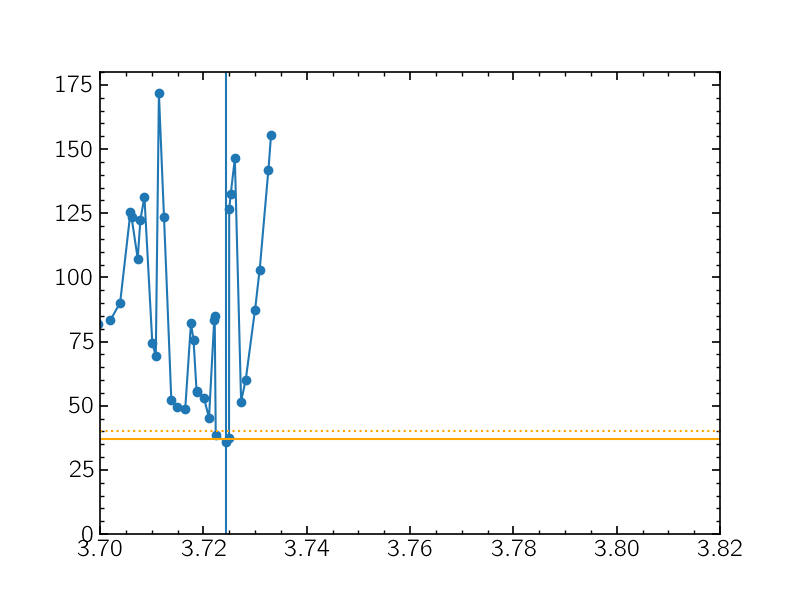

(0.0, 180.01208265373572)

In [46]:
summedchi = pickle.load(open('chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))
a = np.where(summedchi == np.min(summedchi))
A_index_min = a[1][0]
C_index_min = a[0][0]

df = 6
ylimC = 20
chopindC = np.where((parsec_temp['logTe']<3.65) & (parsec_temp['logTe'] > 3.47) & 
                                                    (parsec_temp['C chi2']/df < ylimC)
                                                   )
ylimA = (parsec_temp['A chi2'].loc[A_index_min]/df) * 5
chopindA = np.where((parsec_temp['logTe']<3.82) & (parsec_temp['logTe'] > 3.70) & 
                                                    (parsec_temp['A chi2']/df < ylimA)
                                                   )

teffmin, teffmax, lummin, lummax, xnew_teff, ynew_teff, xnew_lum, ynew_lum = GetMinMax(parsec_temp, 
                                                                                       chopindA, 
                                                                                       'A',
                                                                                       df=6, 
                                                                                       ylim=ylimA, sigma = 1)

print(parsec_temp['logTe'].loc[A_index_min])
%matplotlib notebook
plt.scatter(parsec_temp['logTe'],parsec_temp['A chi2']/6)
plt.plot(xnew_teff,ynew_teff)
plt.axvline(x = parsec_temp['logTe'].loc[A_index_min])
plt.axhline(y=np.min(ynew_teff)+1, color='orange')
plt.axhline(y=np.min(ynew_teff)+4, color='orange', ls=':')
#plt.xlim(3.47,3.6)
plt.xlim(3.70,3.82)
plt.ylim(0,ylimA)

1 of 30


<IPython.core.display.Javascript object>


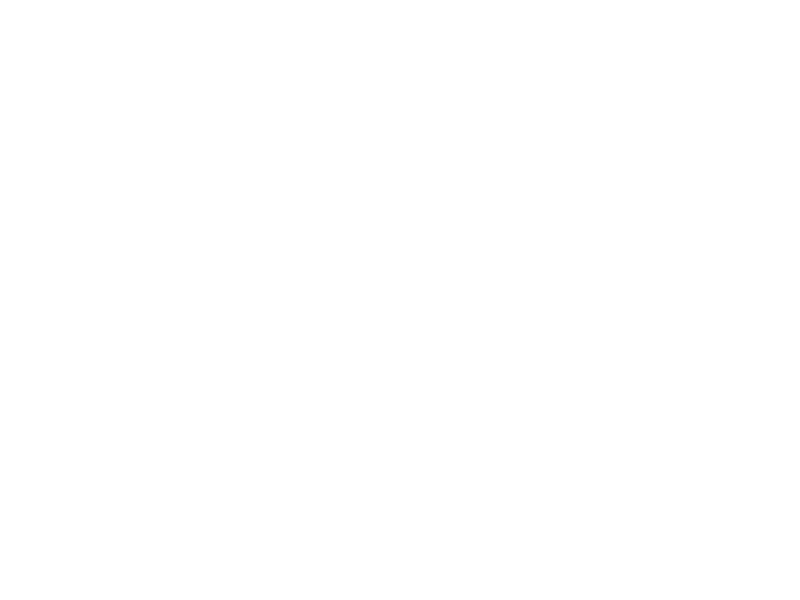

2 of 30


<IPython.core.display.Javascript object>


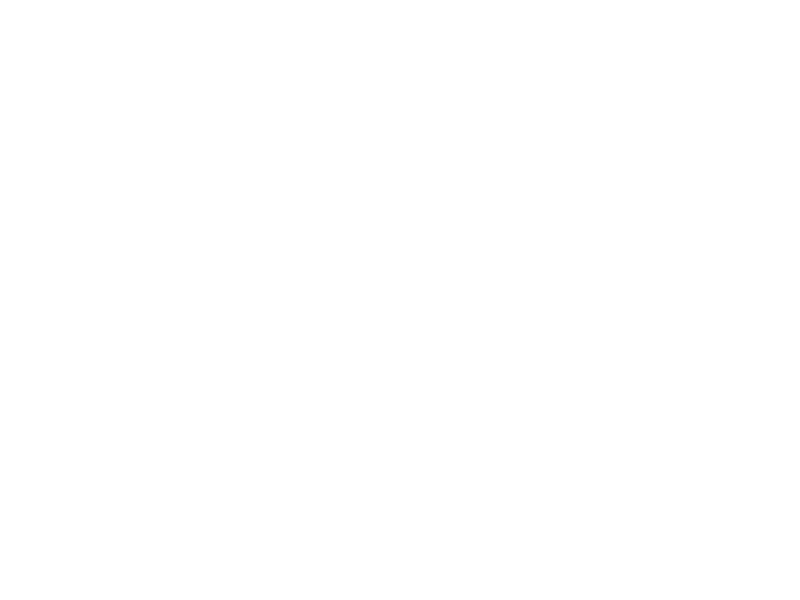

3 of 30


<IPython.core.display.Javascript object>


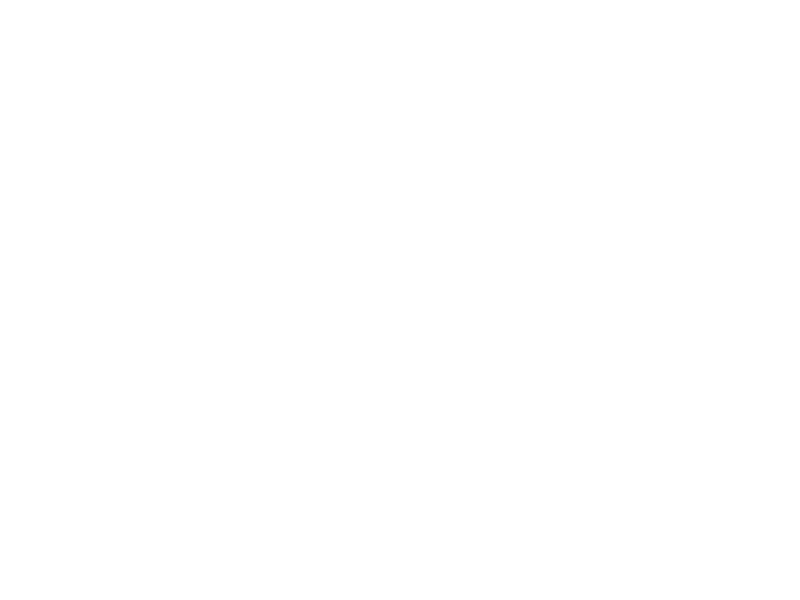

4 of 30


<IPython.core.display.Javascript object>


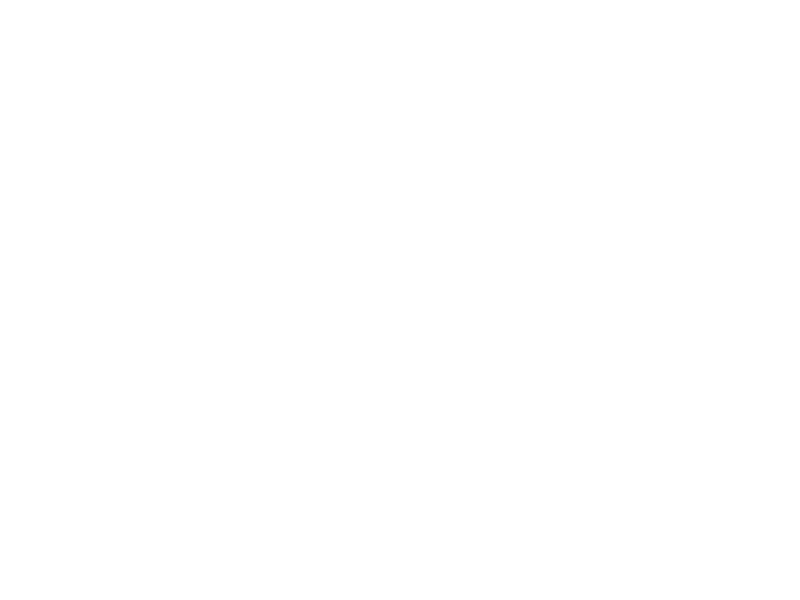

5 of 30


<IPython.core.display.Javascript object>


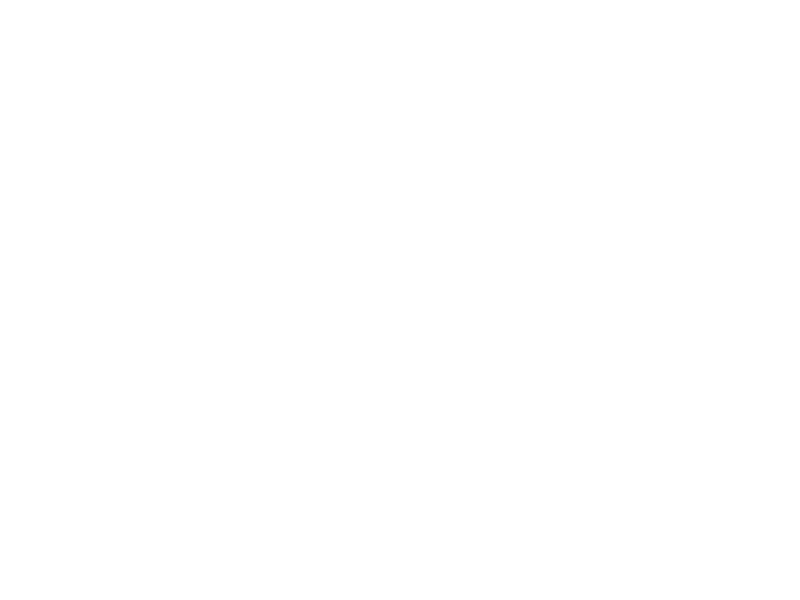

6 of 30


<IPython.core.display.Javascript object>


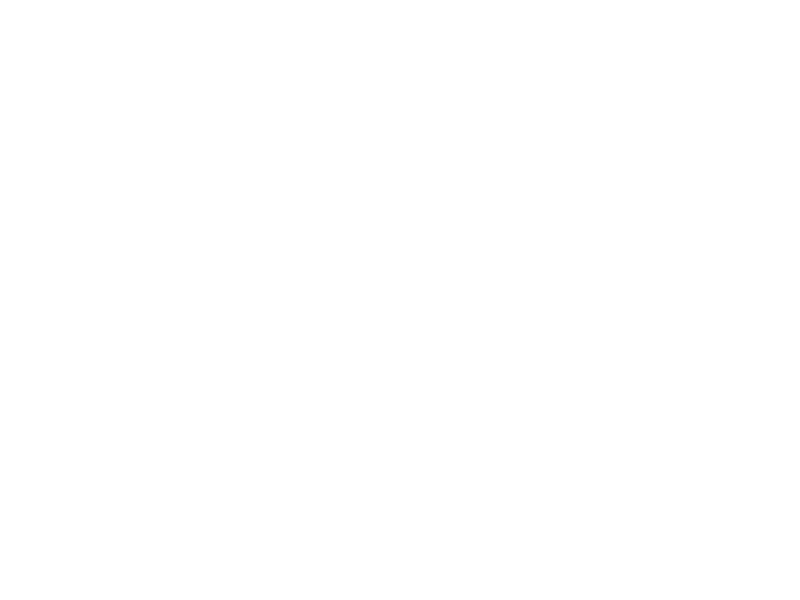

7 of 30


<IPython.core.display.Javascript object>


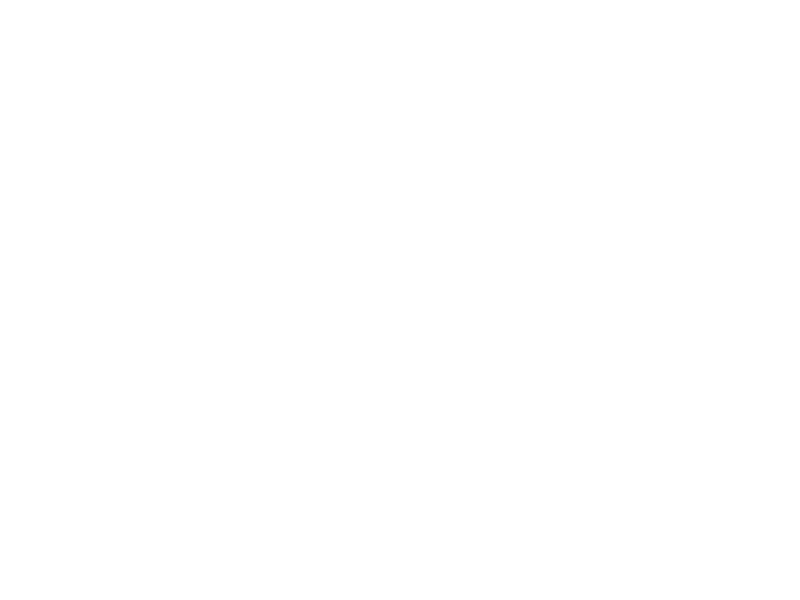

8 of 30


<IPython.core.display.Javascript object>


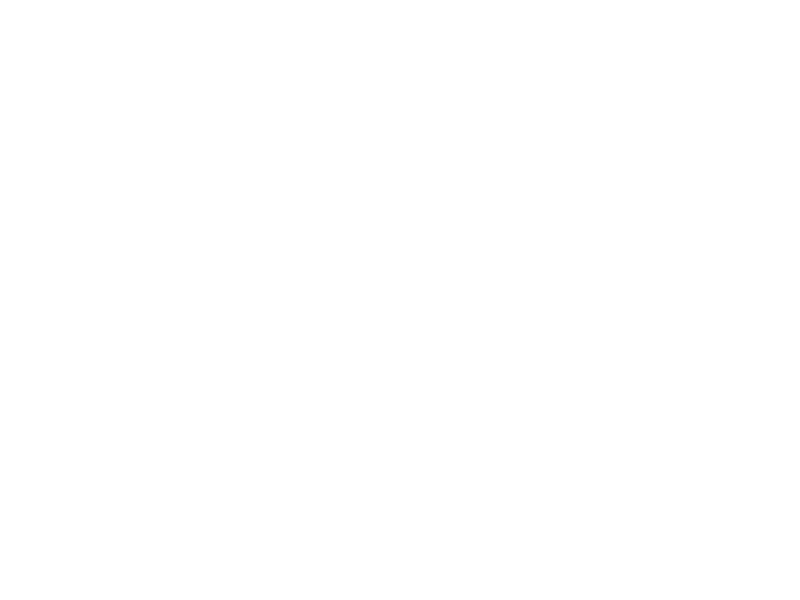

9 of 30


<IPython.core.display.Javascript object>


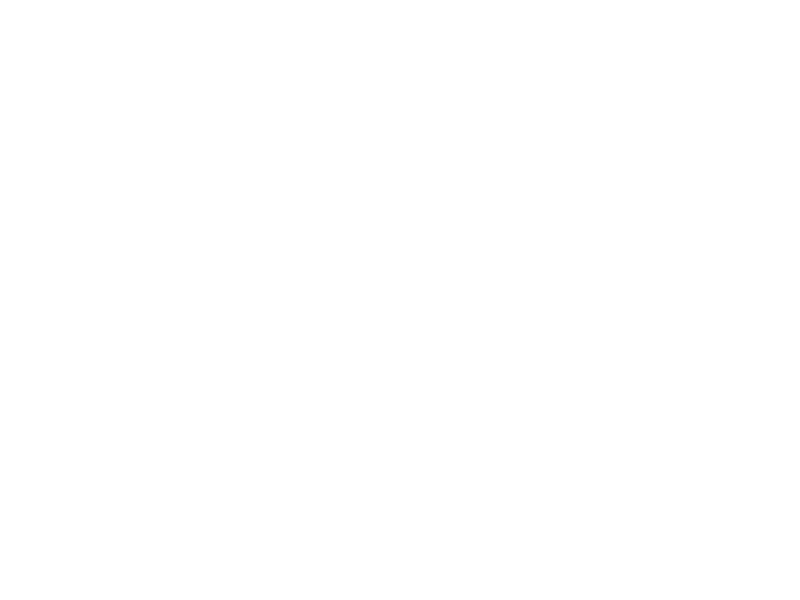

10 of 30


<IPython.core.display.Javascript object>


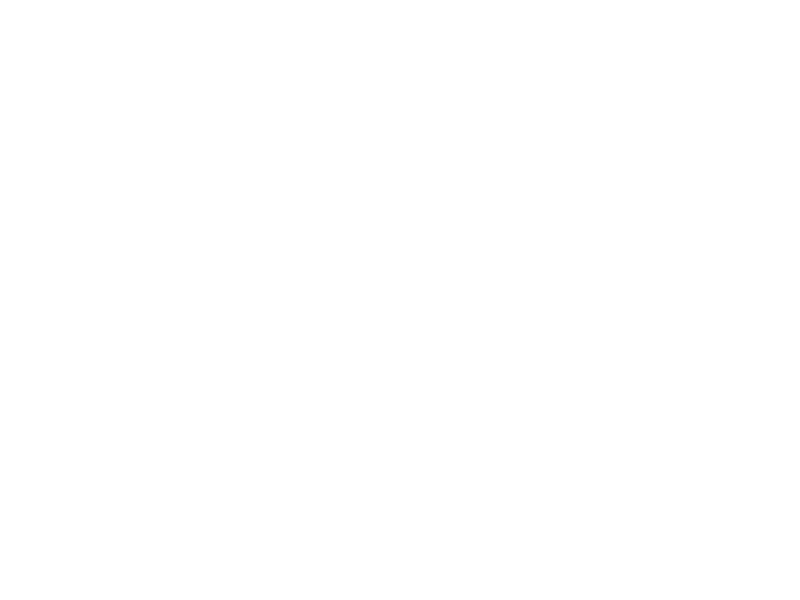

11 of 30


<IPython.core.display.Javascript object>


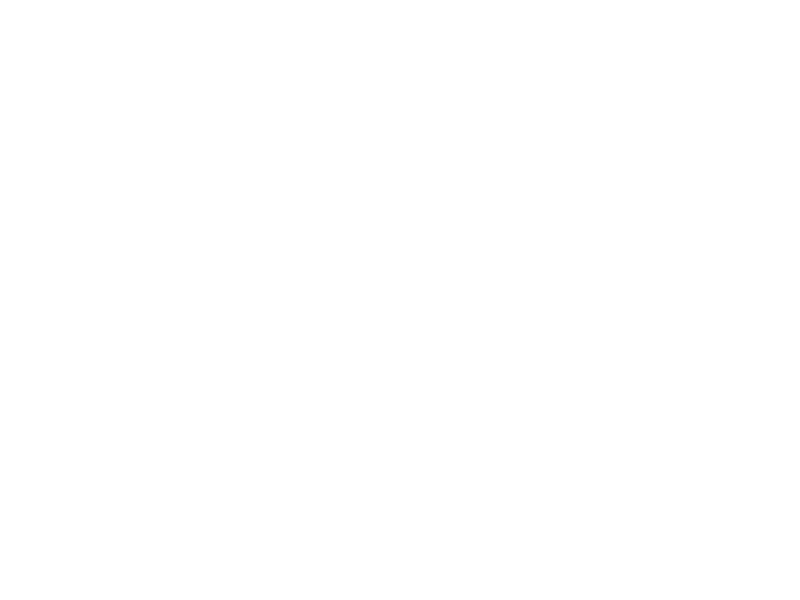

12 of 30


<IPython.core.display.Javascript object>


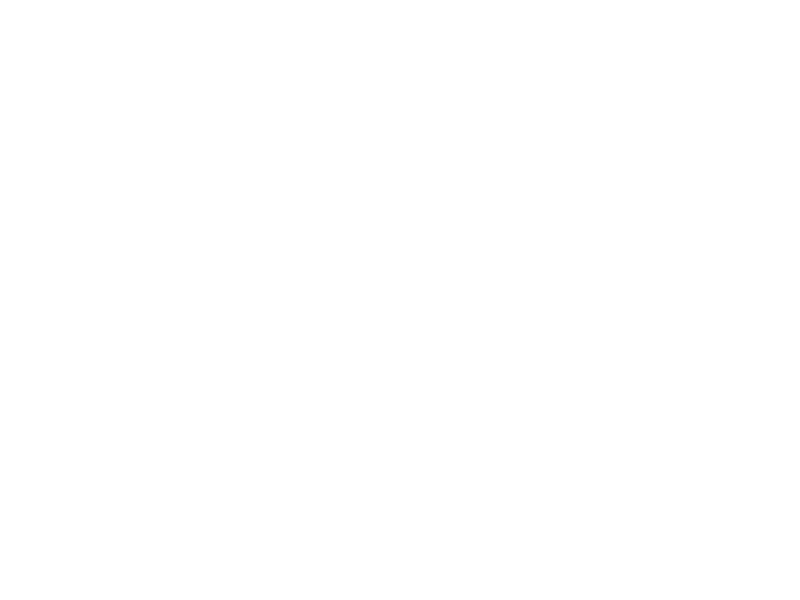

13 of 30


<IPython.core.display.Javascript object>


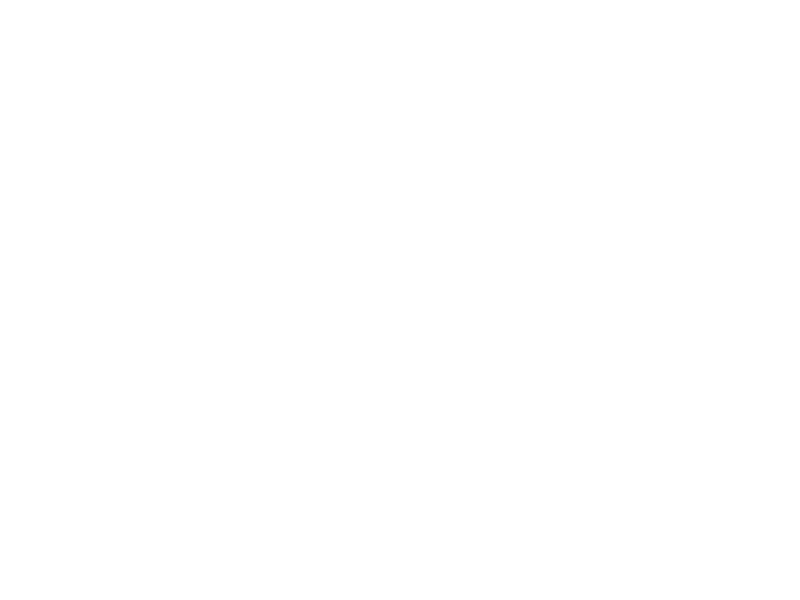

14 of 30


<IPython.core.display.Javascript object>


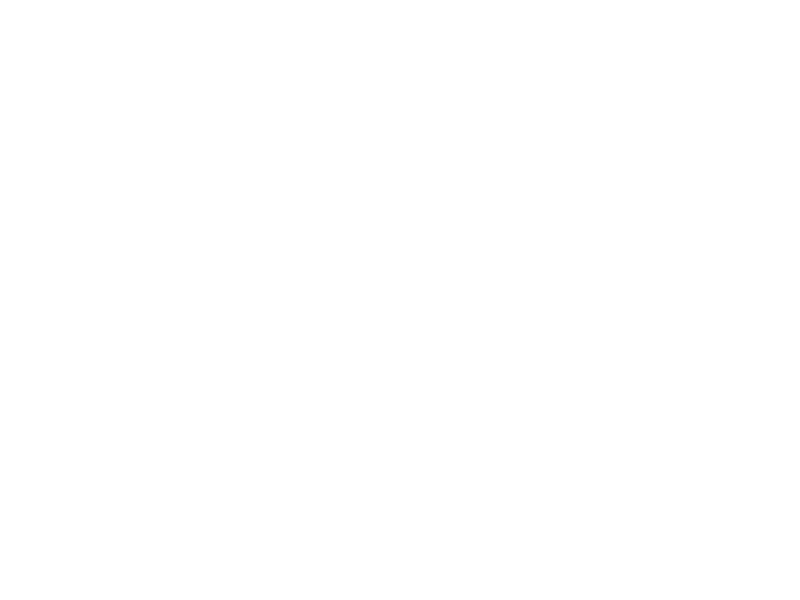

15 of 30


<IPython.core.display.Javascript object>


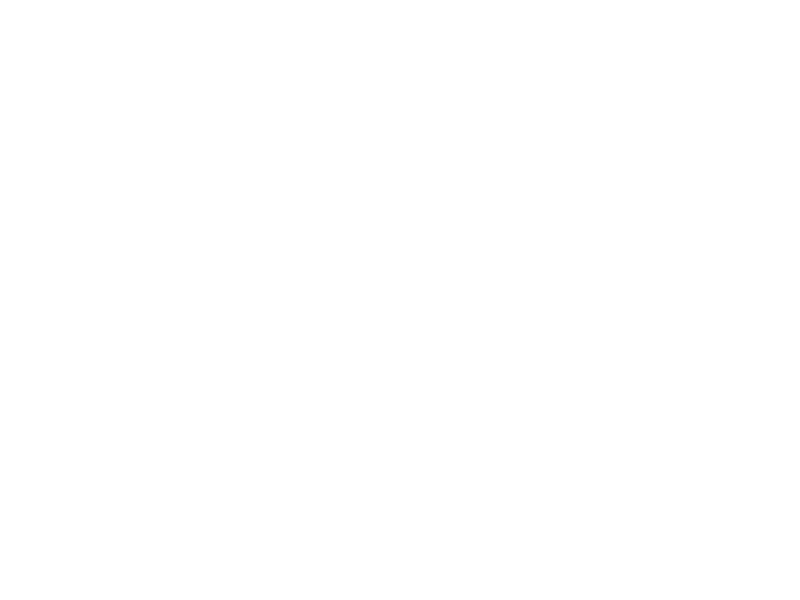

16 of 30


<IPython.core.display.Javascript object>


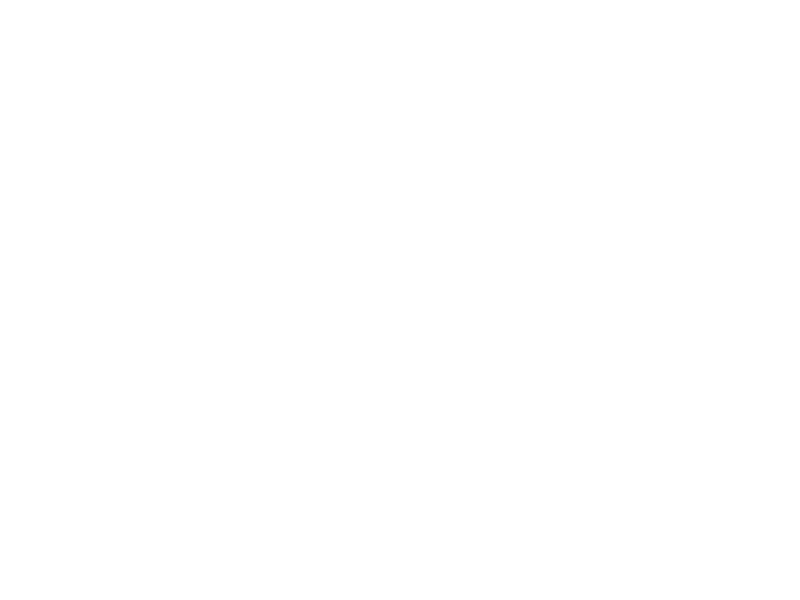

17 of 30


<IPython.core.display.Javascript object>


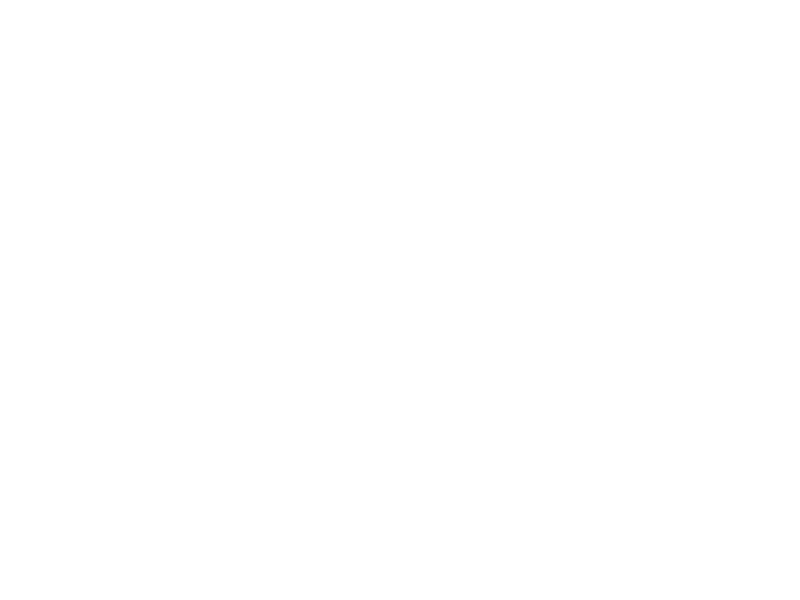

18 of 30


<IPython.core.display.Javascript object>


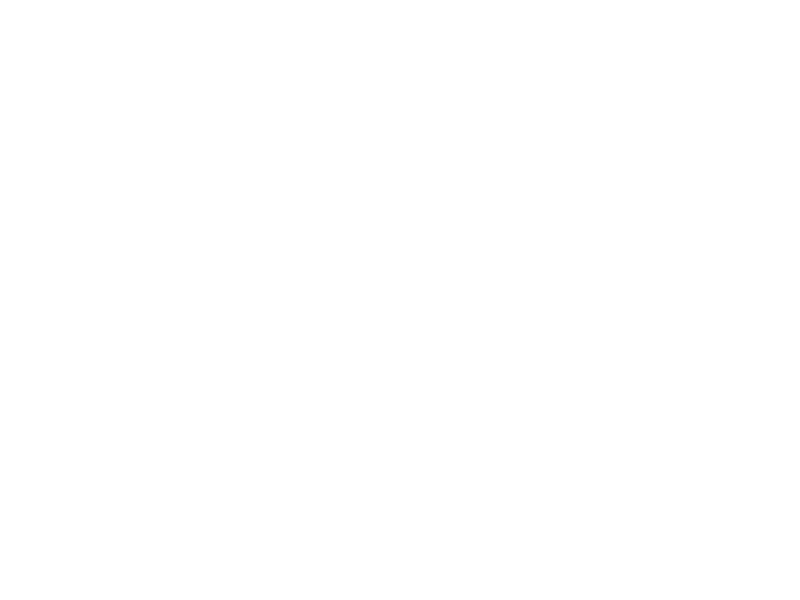

19 of 30


<IPython.core.display.Javascript object>


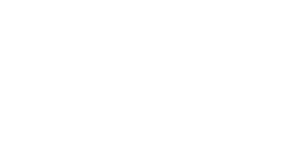

20 of 30


<IPython.core.display.Javascript object>


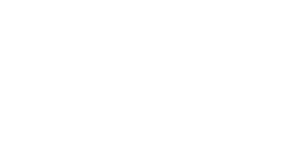

21 of 30


<IPython.core.display.Javascript object>


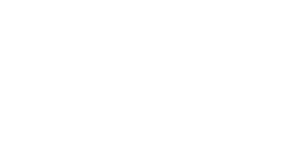

22 of 30


<IPython.core.display.Javascript object>


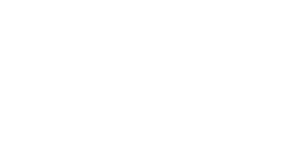

23 of 30


<IPython.core.display.Javascript object>


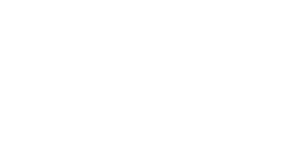

24 of 30


<IPython.core.display.Javascript object>


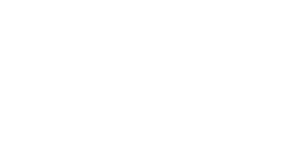

25 of 30


<IPython.core.display.Javascript object>


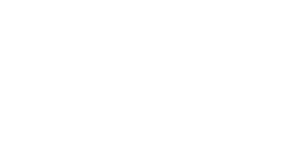

26 of 30


<IPython.core.display.Javascript object>


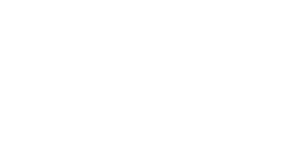

27 of 30


<IPython.core.display.Javascript object>


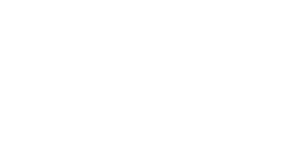

28 of 30


<IPython.core.display.Javascript object>


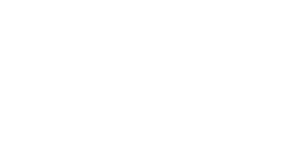

29 of 30


<IPython.core.display.Javascript object>


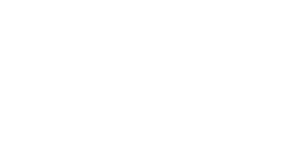

30 of 30


<IPython.core.display.Javascript object>


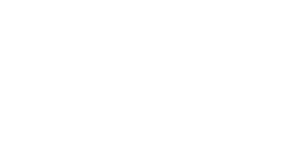

In [56]:
#teffs_dict = {}
#lums_dict = {}
start = 12

for i,age in enumerate(ages[start:]):
    print(i+1,'of',len(ages[start:]))
    multiple = 10
    ind = np.where(parsec['logAge'] == age)
    parsec_temp = parsec.loc[ind]
    parsec_temp = parsec_temp.reset_index(drop=True)
    
    summedchi = pickle.load(open('/Volumes/En/HIP67506/Parsec/chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))
    a = np.where(summedchi == np.min(summedchi))
    A_index_min = a[1][0]
    C_index_min = a[0][0]

    df = 6
    ylimA = (parsec_temp['A chi2'].loc[A_index_min]/df) * multiple
    ylimC = (parsec_temp['C chi2'].loc[C_index_min]/df) * multiple
    
    chopindC = np.where((parsec_temp['logTe']<3.65) & (parsec_temp['logTe'] > 3.47) & 
                                                    (parsec_temp['C chi2']/df < ylimC)
                                                   )
    chopindA = np.where((parsec_temp['logTe']<3.82) & (parsec_temp['logTe'] > 3.70) & 
                                                    (parsec_temp['A chi2']/df < ylimA)
                                                   )
    while np.shape(chopindA)[1] < 3:
        multiple = multiple + 10
        ylimA = (parsec_temp['A chi2'].loc[A_index_min]/df) * multiple
        chopindA = np.where((parsec_temp['logTe']<3.82) & (parsec_temp['logTe'] > 3.70) & 
                                                    (parsec_temp['A chi2']/df < ylimA)
                                                   )
    
    %matplotlib notebook
    plt.figure()
    plt.subplot(221)
    # C:
    plt.scatter(parsec_temp['logTe'].loc[chopindC],parsec_temp['C chi2'].loc[chopindC]/df)
    teffmin, teffmax, lummin, lummax, xnew_teff, ynew_teff, xnew_lum, ynew_lum = GetMinMax(parsec_temp, 
                                                                                           chopindC,
                                                                                           'C',
                                                                                          ylim = ylimC,
                                                                                          sigma = 1)
    plt.plot(xnew_teff,ynew_teff)
    plt.axhline(y=np.min(ynew_teff)+1, color='orange')
    plt.axhline(y=np.min(ynew_teff)+4, color='orange', ls=':')
    plt.xlim(3.47,3.65)
    plt.ylim(0, ylimC)
    plt.xlabel('logTeff')
    plt.ylabel('chi2')
    plt.title('C, age = '+str(age))
    teffs_dict.update({str(age)+'-Teff-C':[teffmin, parsec_temp['logTe'].loc[C_index_min], teffmax]})

    plt.subplot(222)
    plt.scatter(parsec_temp['logL'].loc[chopindC],parsec_temp['C chi2'].loc[chopindC]/df)
    plt.plot(xnew_lum,ynew_lum)
    plt.axhline(y=np.min(ynew_lum)+1, color='orange')
    plt.axhline(y=np.min(ynew_teff)+4, color='orange', ls=':')
    plt.xlim(-2.0,-0.5)
    plt.ylim(0, ylimC)
    plt.xlabel('logL')
    plt.ylabel('chi2')
    lums_dict.update({str(age)+'-Lum-C':[lummin, parsec_temp['logL'].loc[C_index_min], lummax]})

    # Repeat for 2 sigma:
    teffmin, teffmax, lummin, lummax, xnew_teff, ynew_teff, xnew_lum, ynew_lum = GetMinMax(parsec_temp, 
                                                                                           chopindC,
                                                                                           'C', 
                                                                                          ylim = ylimC,
                                                                                          sigma = 2)
    teffs_dict.update({str(age)+'-Teff-C-2Sigma':[teffmin, parsec_temp['logTe'].loc[C_index_min], teffmax]})
    lums_dict.update({str(age)+'-Lum-C-2Sigma':[lummin, parsec_temp['logL'].loc[C_index_min], lummax]})


    # A:
    plt.subplot(223)
    plt.scatter(parsec_temp['logTe'].loc[chopindA],parsec_temp['A chi2'].loc[chopindA]/df)
    teffmin, teffmax, lummin, lummax, xnew_teff, ynew_teff, xnew_lum, ynew_lum = GetMinMax(parsec_temp,
                                                                                           chopindA,
                                                                                           'A',
                                                                                          ylim = ylimA,
                                                                                          sigma=1)
    plt.plot(xnew_teff,ynew_teff)
    plt.axhline(y=np.min(ynew_teff)+1, color='orange')
    plt.axhline(y=np.min(ynew_teff)+4, color='orange', ls=':')
    plt.xlim(3.75, 3.80)
    plt.ylim(0, ylimA)
    plt.xlabel('logTeff')
    plt.ylabel('chi2')
    teffs_dict.update({str(age)+'-Teff-A':[teffmin, parsec_temp['logTe'].loc[A_index_min], teffmax]})

    plt.subplot(224)
    plt.scatter(parsec_temp['logL'].loc[chopindA],parsec_temp['A chi2'].loc[chopindA]/df)
    plt.plot(xnew_lum,ynew_lum)
    plt.axhline(y=np.min(ynew_lum)+1, color='orange')
    plt.axhline(y=np.min(ynew_lum)+4, color='orange', ls=':')
    plt.xlim(0.2,0.5)
    plt.ylim(0, ylimA)
    plt.xlabel('logL')
    plt.ylabel('chi2')
    lums_dict.update({str(age)+'-Lum-A':[lummin, parsec_temp['logL'].loc[A_index_min], lummax]})

    # Repeat for 2 Sigma
    teffmin, teffmax, lummin, lummax, xnew_teff, ynew_teff, xnew_lum, ynew_lum = GetMinMax(parsec_temp,
                                                                                           chopindA,
                                                                                           'A',
                                                                                          ylim = ylimA,
                                                                                          sigma=2)
    teffs_dict.update({str(age)+'-Teff-A-2Sigma':[teffmin, parsec_temp['logTe'].loc[A_index_min], teffmax]})
    lums_dict.update({str(age)+'-Lum-A-2Sigma':[lummin, parsec_temp['logL'].loc[A_index_min], lummax]})

    plt.tight_layout()
    #plt.savefig('/Volumes/En/HIP67506/Parsec/teff-lum-uncert-plot-'+str(age)+'.png')
    plt.close()
    #pickle.dump([teffs_dict,lums_dict],open('Parsec/teff_lum_uncerts.pkl','wb'))





In [34]:
(parsec_temp['A chi2'].loc[A_index_min]/df)

36.00241653074714

In [64]:
parsec = pickle.load(open('parsec-model-fits.pkl','rb'))
ages = np.unique(parsec['logAge'])
chiminsParsec = pickle.load(open('Parsec/Parsec-model-chimins-wconstrainedage.pkl','rb'))

teffs_dict,lums_dict = pickle.load(open('Parsec/teff_lum_uncerts.pkl','rb'))

In [60]:
teffs_dict

{'6.0-Teff-C': [3.4885052052052052, 3.4886, 3.518888988988989],
 '6.0-Teff-C-2Sigma': [3.4885052052052052, 3.4886, 3.519195895895896],
 '6.0-Teff-A': [3.723553953953954, 3.7243, 3.7248187187187187],
 '6.0-Teff-A-2Sigma': [3.7223975975975976, 3.7243, 3.7249993993993993],
 '6.1-Teff-C': [3.5177954954954953, 3.5178, 3.5179544544544545],
 '6.1-Teff-C-2Sigma': [3.4898187187187184, 3.5178, 3.5183518518518517],
 '6.1-Teff-A': [3.7303098098098095, 3.7303, 3.7306027027027024],
 '6.1-Teff-A-2Sigma': [3.7269624624624624, 3.7303, 3.730728228228228],
 '6.2-Teff-C': [3.5169087087087085, 3.5169, 3.517007007007007],
 '6.2-Teff-C-2Sigma': [3.5168104104104105, 3.5169, 3.517301901901902],
 '6.2-Teff-A': [3.7338727727727727, 3.7343, 3.734676376376376],
 '6.2-Teff-A-2Sigma': [3.7332477477477477, 3.7343, 3.7357924924924926],
 '6.3-Teff-C': [3.5151424424424422, 3.5152, 3.5154511511511513],
 '6.3-Teff-C-2Sigma': [3.514936636636637, 3.5152, 3.5161714714714716],
 '6.3-Teff-A': [3.7399048048048047, 3.7406, 3.740

In [139]:
ups = np.array([])
downs = np.array([])
teffs = np.array([])
markersizes = np.array([])

lim = 1e1

for i,age in enumerate(ages):
    up = 10**teffs_dict[str(age)+'-Teff-C'][1] - 10**teffs_dict[str(age)+'-Teff-C'][0]
    down = 10**teffs_dict[str(age)+'-Teff-C'][2] - 10**teffs_dict[str(age)+'-Teff-C'][1]
    if np.isclose(up,0, rtol = lim, atol = lim):
        up = down
    if np.isclose(down,0, rtol = lim, atol = lim):
        down = up
    
    ups = np.append(ups, up)
    downs = np.append(downs, down)
    teffs = np.append(teffs,10**teffs_dict[str(age)+'-Teff-C'][1])
    markersizes = np.append(markersizes,((1/chiminsParsec[i])*20000))
np.shape(markersizes),np.shape(teffs)

Teff = np.average(teffs,weights = markersizes)
Teff

3577.396708502812

<IPython.core.display.Javascript object>


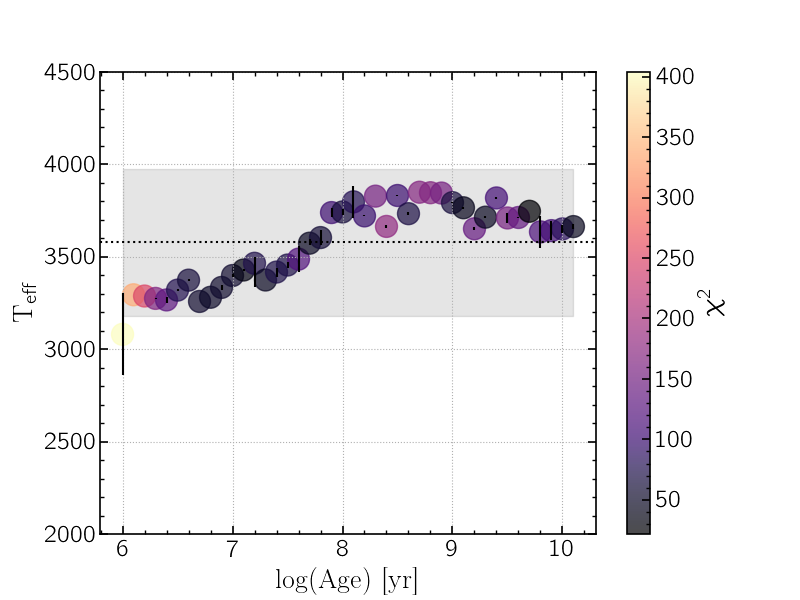

(2000.0, 4500.0)

In [146]:
%matplotlib inline
import matplotlib.colors as colors
plt.axhline(y=Teff, color='black', ls=':')
plt.fill_between(ages, Teff + 400, y2 = Teff - 400, color='black', alpha = 0.1)

s = plt.scatter(ages, teffs, c=chiminsParsec, cmap='magma',
            s=250,
           alpha=0.7#, norm=colors.LogNorm(vmin=20, vmax=500)
               )
plt.errorbar(ages, teffs, yerr = np.array(
                    [ups,
                    downs]),
            color = 'black', ls='None')

cbar = plt.colorbar(s)
cbar.set_label('$\chi^2$')
plt.grid(ls=':')
plt.xlabel('log(Age) [yr]')
plt.ylabel(r'T$_{\mathrm{eff}}$')
plt.ylim(2000,4500)

In [157]:
age = ages[np.where(chiminsParsec == np.min(chiminsParsec))][0]

In [154]:
ages[np.argsort(chiminsParsec)]

array([ 9.7    ,  7.1    ,  9.1    , 10.10001,  9.3    ,  7.7    ,
        7.3    ,  6.8    ,  6.9    ,  7.     ,  6.7    ,  7.8    ,
        6.6    ,  8.     ,  9.     ,  8.6    ,  7.4    ,  7.5    ,
        7.2    ,  6.5    ,  8.1    , 10.00001,  8.2    ,  8.5    ,
        7.9    ,  9.90001,  9.4    ,  9.8    ,  7.6    ,  6.4    ,
        9.6    ,  9.2    ,  8.3    ,  9.5    ,  8.9    ,  6.3    ,
        8.8    ,  8.7    ,  8.4    ,  6.2    ,  6.1    ,  6.     ])

In [166]:
chiminsParsec[np.argsort(chiminsParsec)]

array([ 21.72511117,  34.18178041,  42.08753527,  43.33225075,
        45.67162236,  45.88232147,  46.87922395,  51.39211314,
        55.48236462,  56.64984825,  57.11518817,  61.9855368 ,
        63.9361894 ,  64.49888881,  65.09301839,  69.43000637,
        71.09327722,  71.28425815,  73.49862533,  76.03125061,
        79.80538508,  83.20892274,  96.86581539,  99.53560247,
       101.2641337 , 105.62141646, 106.12562779, 116.57742089,
       118.24519146, 128.62665308, 135.37383659, 137.47325181,
       152.30391202, 153.85431415, 154.31357089, 164.91551727,
       165.17712537, 167.73754755, 177.49730492, 249.24002958,
       337.65629545, 403.9194039 ])

In [158]:
ind = np.where(parsec['logAge'] == age)
parsec_temp = parsec.loc[ind]
parsec_temp = parsec_temp.reset_index(drop=True)
parsec_temp

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
0,0.000155,-2.0,9.7,0.093634,1.115611,0.094,-3.059,3.5119,5.467,1,...,12.417,19.195,15.303,13.345,12.347,11.804,0.998,1.958,6.208819e+05,36304.070244
1,0.000155,-2.0,9.7,0.100063,1.171628,0.100,-2.860,3.5397,5.408,1,...,11.919,17.615,14.338,12.573,11.815,11.373,0.758,1.765,5.296326e+05,28177.357212
2,0.000155,-2.0,9.7,0.103569,1.200243,0.103,-2.756,3.5541,5.377,1,...,11.661,16.855,13.850,12.203,11.536,11.142,0.667,1.647,4.863914e+05,24408.512883
3,0.000155,-2.0,9.7,0.123439,1.341567,0.123,-2.482,3.5820,5.290,1,...,10.975,15.305,12.753,11.354,10.814,10.496,0.540,1.399,3.908900e+05,15965.855131
4,0.000155,-2.0,9.7,0.143309,1.456032,0.143,-2.310,3.5955,5.238,1,...,10.546,14.513,12.148,10.869,10.373,10.083,0.496,1.279,3.403221e+05,11703.248575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,0.041619,0.5,9.7,1.328020,2.522580,0.826,3.595,3.3705,-0.807,8,...,-4.219,12.082,8.223,4.607,1.060,-1.191,3.547,3.616,1.521766e+05,91272.278696
1574,0.041619,0.5,9.7,1.328020,2.522580,0.797,3.630,3.3623,-0.890,8,...,-4.305,12.398,8.375,4.695,1.073,-1.213,3.622,3.680,1.576605e+05,91306.562296
1575,0.041619,0.5,9.7,1.328021,2.522580,0.765,3.644,3.3582,-0.937,8,...,-4.341,12.504,8.420,4.716,1.075,-1.222,3.641,3.704,1.593892e+05,91377.283317
1576,0.041619,0.5,9.7,1.328022,2.522580,0.732,3.651,3.3562,-0.971,8,...,-4.356,12.549,8.439,4.723,1.076,-1.226,3.647,3.716,1.601108e+05,91411.514011


In [162]:
summedchi = pickle.load(open('chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))
a = np.where(summedchi == np.min(summedchi))
A_index_min = a[1]
C_index_min = a[0]
parsec_temp.loc[C_index_min]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
1299,0.041619,0.5,9.7,0.624793,2.337161,0.625,-1.172,3.5736,4.652,1,...,7.7,12.741,9.979,8.787,7.791,7.272,0.996,1.192,151421.310998,16.116708


In [163]:
parsec_temp.loc[A_index_min]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
1009,0.01471,0.0,9.7,1.077861,2.48787,1.077,0.275,3.7851,4.287,1,...,4.083,5.513,4.336,3.953,3.88,3.891,0.073,0.383,5.734345,27970.788803


In [164]:
age = 7.1
ind = np.where(parsec['logAge'] == age)
parsec_temp = parsec.loc[ind]
parsec_temp = parsec_temp.reset_index(drop=True)

summedchi = pickle.load(open('chi2-matrix-constrainedage-'+
                               str(np.round(age,decimals=2))+'.pkl','rb'))
a = np.where(summedchi == np.min(summedchi))
A_index_min = a[1]
C_index_min = a[0]
parsec_temp.loc[C_index_min]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
926,0.004831,-0.5,7.1,0.351853,2.046443,0.352,-1.197,3.5351,4.274,0,...,7.762,13.015,10.257,8.827,7.863,7.311,0.964,1.43,160502.764277,32.442547


In [165]:
parsec_temp.loc[A_index_min]

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,mbolmag,umag,gmag,rmag,imag,zmag,r-i,g-r,A chi2,C chi2
956,0.004831,-0.5,7.1,1.090286,2.49003,1.089,0.297,3.7797,4.249,0,...,4.027,5.337,4.312,3.947,3.858,3.855,0.089,0.365,2.067758,28297.037212
